# Ref: 
https://analyticsindiamag.com/gluonts-pytorchts-for-time-series-forecasting/

# Plot 

In [ ]:
from fund_price_loader import NAV_DIR
from fund_price_loader import load_dataset

In [ ]:
import os
from gluonts.dataset.util import to_pandas


nav_files = os.listdir(NAV_DIR)
file_path = os.path.join(NAV_DIR, nav_files[800])
print(f"file_path: {file_path}")
dataset = load_dataset(file_path)
to_pandas(list(dataset)[0]).plot(linewidth=2)

In [ ]:
from gluonts.model import prophet
predictor = prophet.ProphetPredictor(
    freq="D", prediction_length=100)
predictions = predictor.predict(dataset)
for entry, forecast in zip(dataset, predictions):
    to_pandas(entry).plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])

# Evaluation 

- split Train and Test Dataset 
- calculate RMSE

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
from fund_price_loader import NAV_DIR
from gluonts.dataset.util import to_pandas

nav_files = os.listdir(NAV_DIR)
file_path = os.path.join(NAV_DIR, nav_files[800])

In [ ]:
from fund_price_loader import load_split_dataset
from datetime import datetime
train, test = load_split_dataset(file_path, datetime(year=2021, month=5, day=30))

In [ ]:
to_pandas(list(train)[0]).plot(linewidth=2)
to_pandas(list(test)[0]).plot(linewidth=2)

In [ ]:
from evaluator import evaluation
from gluonts.model import prophet

evaluation(prophet.ProphetPredictor, train, test, verbose=True)

# Back Testing Splitting

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
from fund_price_loader import NAV_DIR
from gluonts.dataset.util import to_pandas
from gluonts.model import prophet
nav_files = os.listdir(NAV_DIR)
file_path = os.path.join(NAV_DIR, nav_files[1000])

from backtesting import parallel_run

Importing plotly failed. Interactive plots will not work.


In [2]:
train_ends, rmses = parallel_run(file_path, prophet.ProphetPredictor, 14, 35)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override th


Initial log joint probability = -7.75658
Iteration  1. Log joint probability =     2.6947. Improved by 10.4513.
Iteration  2. Log joint probability =    6.19516. Improved by 3.50046.
Iteration  3. Log joint probability =    7.75843. Improved by 1.56327.
Iteration  4. Log joint probability =    9.40269. Improved by 1.64427.
Iteration  5. Log joint probability =    10.6327. Improved by 1.23002.
Iteration  6. Log joint probability =    11.7736. Improved by 1.14092.
Iteration  7. Log joint probability =    14.9451. Improved by 3.1715.
Iteration  8. Log joint probability =    16.3321. Improved by 1.387.
Iteration  9. Log joint probability =    17.6997. Improved by 1.36752.
Iteration 10. Log joint probability =    19.1594. Improved by 1.45976.
Initial log joint probability = -2.03146
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        602.66    0.00248905        316.09           1           1      129   
    Iter      log prob        |

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

Iteration 16. Log joint probability =    26.8664. Improved by 2.41609.
     590       854.044   4.13208e-05       186.752   1.718e-07       0.001      825  LS failed, Hessian reset 
     599       854.106   4.66061e-05       100.935      0.5319      0.5319      836   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     681       854.202    2.6961e-05       127.744     4.5e-07       0.001     1001  LS failed, Hessian reset 
     699        854.22   0.000110066       67.4307           1           1     1020   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 17. Log joint probability =    28.0125. Improved by 1.14615.
     733       854.238   6.10681e-08       58.6105       0.255      0.7913     1062   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Iteration 18. Log joint probability =    28.8628. Improved by 0.850225.
Iteration 19.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     199       1147.57   0.000327001       190.842           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 28. Log joint probability =    41.0024. Improved by 2.19999.
     799       1036.81   5.87362e-06       85.7771     0.05623           1     1222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration  2. Log joint probability =    209.307. Improved by 48.8526.
     220       1149.17   6.10356e-05       108.836   2.285e-07       0.001      364  LS failed, Hessian reset 
Initial log joint probability = -2.03185
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     851       1036.81   1.34914e-05       71.6069   1.475e-07       0.001     1358  LS failed, Hessian reset 
     899       1036.81    1.0119e-06       73.9909           1           1     1421   
    Iter      log prob        ||dx||      ||grad||       a

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Iteration  7. Log joint probability =    158.558. Improved by 0.188041.
     399       1198.63   0.000289477       78.8206      0.4572           1      562   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1377.86    0.00105024       414.474      0.4206      0.4206      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 11. Log joint probability =    306.008. Improved by 0.15838.
     359       1383.59   6.97941e-05       194.087   1.656e-07       0.001      466  LS failed, Hessian reset 
Iteration  8. Log joint probability =    158.974. Improved by 0.416642.
Iteration 39. Log joint probability =    55.3434. Improved by 1.75326.
     376       1384.18   2.97105e-05       74.7263   1.534e-07       0.001      532  LS failed, Hessian reset 
     399       1384.63    0.00063013       220.318      0.6499      0.6499      557   
    Iter      log prob        ||dx||      ||gra

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       1692.44   0.000167519        305.52      0.2716           1     1018   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1280        1395.7   7.29086e-05       103.054   1.275e-06       0.001     2023  LS failed, Hessian reset 
Iteration 22. Log joint probability =    318.042. Improved by 5.06659.
Iteration 23. Log joint probability =    319.899. Improved by 1.85705.
     799          1767    0.00252898       104.986      0.9379      0.9379     1125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       1395.71   2.00205e-05       69.5493      0.3659           1     2050   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 19. Log joint probability =    169.042. Improved by 4.26138.
     832       1693.28   1.84183e-05       107.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Iteration 52. Log joint probability =     330.76. Improved by 0.0490969.
     799       1943.98   1.63661e-05       49.9641           1           1     1116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 792. Log joint probability =    86.5473. Improved by 3.50344e-05.
Iteration 793. Log joint probability =    86.5473. Improved by 3.46188e-05.
Iteration 48. Log joint probability =    179.357. Improved by 0.151384.
Iteration 794. Log joint probability =    86.5473. Improved by 1.04214e-05.
Iteration 795. Log joint probability =    86.5473. Improved by 4.41508e-05.
Iteration 796. Log joint probability =    86.5474. Improved by 4.21631e-05.
Iteration 797. Log joint probability =    86.5474. Improved by 4.05268e-05.
Iteration 798. Log joint probability =    86.5475. Improved by 3.91799e-05.
Iteration 799. Log joint probability =    86.5475. Improved by 3.80251e-05.
Iteration 800. Log joint probability =    86.5475. Improved by 3.715

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Iteration 1732. Log joint probability =    86.5803. Improved by 3.57531e-05.
Iteration 1733. Log joint probability =    86.5804. Improved by 3.50306e-05.
Iteration 85. Log joint probability =    331.539. Improved by 0.000166825.
Iteration 1734. Log joint probability =    86.5804. Improved by 3.44284e-05.
Iteration 83. Log joint probability =    180.007. Improved by 4.6459e-06.
Iteration 1735. Log joint probability =    86.5804. Improved by 3.39252e-05.
Iteration 1736. Log joint probability =    86.5805. Improved by 3.36765e-05.
Iteration 1737. Log joint probability =    86.5805. Improved by 7.05437e-06.
Iteration 1738. Log joint probability =    86.5805. Improved by 4.33578e-05.
Iteration 1739. Log joint probability =    86.5806. Improved by 4.13207e-05.
Iteration 1740. Log joint probability =    86.5806. Improved by 3.96871e-05.
Iteration 1741. Log joint probability =    86.5806. Improved by 3.82634e-05.
Iteration 1742. Log joint probability =    86.5807. Improved by 3.71704e-05.
Iter

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099        2578.5   0.000379123       328.937      0.1121      0.5361     1418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 133. Log joint probability =     331.54. Improved by 1.69652e-07.
Iteration 134. Log joint probability =     331.54. Improved by 1.01778e-07.
Iteration 135. Log joint probability =     331.54. Improved by 1.0709e-07.
    1199       2579.32    0.00356822       208.269           1           1     1542   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Iteration 136. Log joint probability =     331.54. Improved by 2.99489e-08.
Initial log joint probability = -13.8135
      99       2913.88   0.000969439       704.679      0.4883      0.4883      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    Iter      log prob     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1484       2968.27   9.98297e-06       137.843   9.805e-08       0.001     1922  LS failed, Hessian reset 
     633       3283.68   2.83275e-05       283.156   2.528e-07       0.001      801  LS failed, Hessian reset 
     499       3491.38     0.0114601       859.565           1           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       2968.29   7.79786e-05       117.627           1           1     1942   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       3198.66   0.000690657       537.303      0.6017      0.6017     1206   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     820       3371.32   6.79834e-06       87.9269   4.676e-08       0.001     1067  LS failed, Hessian reset 
     662       3289.99   1.25486e-05       191.588   6.723e-08       0.001      881  LS failed, Hessian reset 
    1199       3160

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1270       3542.07    1.0057e-05       150.452   7.455e-08       0.001     1715  LS failed, Hessian reset 
     544        3811.5   4.44787e-09       164.116   7.792e-07           1      666   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
    2099       3164.56   0.000134795       138.522      0.2296           1     3027   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       3542.42   0.000380127       306.842      0.4987           1     1750   
    1430       3375.69   1.37482e-05        156.56   1.492e-07       0.001     2301  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       3576.62    0.00163265       603.923           1           1      952   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1691        3201.7   1.94618e-05       240.59

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1653       3549.32   2.27525e-05       329.247   9.482e-08       0.001     2317  LS failed, Hessian reset 
    1199        3599.5   0.000686547       253.411      0.5004           1     1464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -24.3405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       3549.87   3.24748e-05       102.938       0.309       0.309     2370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       3330.01   0.000414569       236.975      0.7091      0.7091     2832   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3681.88     0.0119974       1293.37           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3732.14     0.0200537    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2547       3332.93   5.79752e-06       96.9447   7.314e-08       0.001     3901  LS failed, Hessian reset 
    2599       3333.01   0.000126315       76.4926      0.2813           1     3967   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       3782.56   6.19068e-06       121.204        0.34           1     2355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       3615.52   0.000366096       97.3398           1           1     2485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4204.73    0.00720153       1117.82           1           1      564   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       3942.18      0.003401       555.818      0.5974      0.9219     1120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1653       3962.56   1.28624e-05       174.531   1.011e-07       0.001     1990  LS failed, Hessian reset 
    1348          4232   3.20164e-05       148.094   2.333e-07       0.001     1755  LS failed, Hessian reset 
    3199       3565.25     0.0117425       984.169      0.3527           1     4694   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2405       3786.73   8.33493e-06       111.532   3.251e-08       0.001     3390  LS failed, Hessian reset 
    1544       4095.84   7.14964e-05       359.143    3.15e-08       0.001     2029  LS failed, Hessian reset 
    1699       3962.89   0.000300683       63.4721           1           1     2047   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       4267.51    0.00415547       320.995           1           1     1346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4373

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     799       4411.48   0.000720881        114.71           1           1      925   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       3787.23   8.87296e-05       99.5487           1           1     3855   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4350.66     0.0163297        3517.8      0.4383           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       3965.32   2.25401e-05       85.5553       0.575       0.575     2547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3599       3570.33   0.000181829       281.944           1           1     5264   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1874       4100.16   1.14198e-05       160.141   6.905e-08       0.001     2543  LS failed, Hessian r

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1099        4562.3    0.00857478       745.414           1           1     1239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2156       4303.36   1.03675e-05       131.793   4.037e-08       0.001     2599  LS failed, Hessian reset 
    2299       4248.03   0.000776263       98.4222           1           1     3112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2499       4101.97   0.000463841        160.87           1           1     3475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       4303.68    0.00108128       289.342      0.2657           1     2647   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -39.9902
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2319       4248.24   1.51005e-05    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     299       4727.03     0.0172654       1063.63      0.9996      0.9996      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2774       4102.73   8.37374e-08       58.4318      0.1232      0.3328     3851   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1399       4567.26   2.75507e-05       50.5741           1           1     1673   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       4628.23    0.00751581       5447.89      0.5586      0.5586      919   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2490        4308.6   8.16517e-06       129.871   5.746e-08       0.001     3065  LS failed, Hessian reset 
     299       4636.77     0.0192531       3439.45           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alph

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2765       4249.87   5.19261e-06       68.6061   3.448e-08       0.001     3893  LS failed, Hessian reset 
    1699       4572.35    0.00401306       354.553      0.2503           1     2079   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     681       4808.11   3.29191e-05       443.933   8.564e-08       0.001      814  LS failed, Hessian reset 
    2799       4249.88   7.14824e-06       62.1247      0.8545      0.8545     3935   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       4809.17   0.000212915       452.508           1           1      832   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       4662.87    0.00210979       399.508           1           1     1409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       4932.12     0.0138569       1802.24           1

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1899       4573.93    0.00041158       164.589           1           1     2486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999        4986.4    0.00988432       1072.28           1           1     1137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4965.54    0.00529507       1041.81      0.9646      0.9646      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5083.17     0.0356347       711.092           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3125       4313.28   4.52543e-06       66.2852   6.048e-08       0.001     4073  LS failed, Hessian reset 
    1499       4673.97   0.000858327       210.984           1           1     1801   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

    1599       5012.69   4.81309e-05       143.956      0.9377      0.9377     1939   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       4677.31   6.23678e-05       81.5585      0.9716      0.9716     2633   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       5300.84    0.00364294       292.011           1           1     1011   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5027.93      0.142435       2373.47           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2484       4580.26   1.82495e-05       243.073   1.362e-07       0.001     3367  LS failed, Hessian reset 
    2499        4580.3    0.00016105       292.615      0.3722           1     3386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2314       4685.05   7.21488e-05       370.519   1.849e-07       0.001     3050  LS failed, Hessian reset 
    2099        4868.2     0.0179946       238.647           1           1     2480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       5374.37    0.00187978       1378.83         0.7         0.7     1456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       5022.81   0.000119333         370.2           1           1     2439   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       5194.43    0.00790645        804.16           1           1     1477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       5161.08     0.0179265       605.664           1           1      808   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

    2799       4687.19   3.69616e-05       89.3512      0.9917      0.9917     3907   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       5407.46   0.000446014       420.051           1           1     2181   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199          5321    0.00484149       1232.56      0.1605           1     1382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2803        4687.2   7.18238e-06       98.0228   3.616e-08       0.001     3956  LS failed, Hessian reset 
    1299       5261.91    0.00336298       216.031           1           1     1499   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       5214.08    0.00454813       1458.47      0.3387           1     2158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2199       5411.84   5.27809e-05       71.5469      0.4754      0.4754     2573   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2165       5220.99   1.54622e-05       315.739   7.447e-08       0.001     2513  LS failed, Hessian reset 
    2799        5028.1    0.00255413        354.03           1           1     3638   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199        5221.8   0.000267076       235.661           1           1     2552   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1484       5329.54   1.20161e-05        162.19   3.684e-08       0.001     1786  LS failed, Hessian reset 
    3041       4687.36   6.55041e-06       56.2399   1.275e-07       0.001     4490  LS failed, Hessian reset 
    1499       5329.93   0.000177839       368.873       2.705      0.2705     1805   
    Iter      log prob        ||dx||      |

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     299       5710.64    0.00241081       380.926           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       5473.27    0.00382805       760.867           1           1     1597   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2799       5227.72    0.00335046        102.66      0.7927      0.7927     3267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2005       5337.96   7.93482e-06       111.652   8.633e-08       0.001     2494  LS failed, Hessian reset 
     499       5580.04       0.10397       9323.02           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2129       5292.86   7.27702e-06       109.265   1.038e-07       0.001     2608  LS failed, Hessian reset 
    2899       5431.05    9.6453e-05       63.9819           1

    3400       5435.95   2.10408e-05       394.165   6.781e-08       0.001     4082  LS failed, Hessian reset 
    1699       5481.73   0.000341999       149.088      0.8228      0.8228     2348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       6007.96    0.00185206       287.857           1           1     1014   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       6161.23    0.00181174       638.268           1           1      682   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       5641.89    0.00379182       698.093      0.2597      0.8797     1286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       5345.16   0.000552947       156.634           1           1     3240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1499       6065.49   0.000185713         127.1           1           1     1697   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2956       5345.56   4.32019e-06       74.9141   6.936e-08       0.001     3905  LS failed, Hessian reset 
    1199       6288.56    0.00404031       904.594           1           1     1363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3922       5437.77   8.16881e-06       189.573   4.871e-08       0.001     4929  LS failed, Hessian reset 
    3842       5232.45   3.60672e-06       55.3775    1.85e-08       0.001     4946  LS failed, Hessian reset 
    2999       5345.58   0.000124766       68.1399           1           1     3959   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2166       5485.59   5.19318e-06       76.6518   8.038e-08       0.001     3092  LS failed, Hessian reset 
    1699       5658

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    2448       5486.05    9.5078e-06       77.6476   1.277e-07       0.001     3708  LS failed, Hessian reset 
    3475       5304.95   3.27535e-06       67.7352   6.317e-08       0.001     4772  LS failed, Hessian reset 
    4369       5232.91   9.26797e-06       125.028   2.041e-07       0.001     5670  LS failed, Hessian reset 
    1954       6080.38   5.20703e-06       162.167   3.961e-08       0.001     2360  LS failed, Hessian reset 
    3499       5304.95   3.15696e-06       48.8413      0.2366           1     4798   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       5660.12   0.000335991       285.884      0.5894      0.5894     2471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2462       5486.05   2.66258e-07       42.3537       0.379           1     3734   
Optim

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -36.778
    2199       6081.65    0.00027325       216.699           1           1     2648   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299        5662.5   5.66719e-05       130.704           1           1     2907   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4552          5233    1.0245e-06       40.9571    2.02e-08       0.001     6067  LS failed, Hessian reset 
    4554          5233   2.34331e-07       38.9596       0.192           1     6072   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1942       6323.22   1.23193e-05       179.647     1.5e-07       0.001     2296  LS failed, Hessian reset 
    3754       5306.63   4.11601e-06       79.2635   3.373e-08       0.001     5191  LS failed,

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    4187       5307.36    1.5629e-07       44.0268      0.1903      0.6414     5942   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     499       5904.14     0.0158903       697.012           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2788       5664.76   4.87056e-06       44.4043   2.908e-08       0.001     3679  LS failed, Hessian reset 
    2552       6085.55    2.7821e-06       51.7719   1.636e-08       0.001     3337  LS failed, Hessian reset 
    2796       5664.76     8.262e-09       52.4188    0.001797           1     3700   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
     999       6220.69    0.00192271       503.347           1           1     1129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       5810.23     0.011702

    1699       6281.58   0.000337582       210.072           1           1     1938   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6049.38   0.000429291       1505.28      0.3525      0.3525      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       5882.78    0.00122537       389.799           1           1     1499   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       6051.75    0.00197549        595.02           1           1     1030   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199        6117.6   0.000191315       368.489      0.9422      0.9422     1414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3099       6334.56   7.22539e-05       80.0007           1           1     3800   
    Iter      log 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2199       6308.45   0.000158201       476.762      0.6004      0.6004     2572   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699        5892.4    0.00397795       285.966       1.433      0.1433     2088   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       6267.29      0.016024       810.072           1           1     1036   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -52.811
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       6140.58    0.00115352       739.085      0.5021      0.5021     1974   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       6309.55   5.69221e-05       625.687      0.1684           1     2692   
    Iter      log prob        ||dx||      ||grad||       alpha   

    1699       6240.16   0.000284533       330.563     0.09446      0.3979     2039   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       6459.89    0.00533799       2596.77      0.3457      0.3457      794   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2799       6315.24    0.00133305       478.269           1           1     3376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       6630.25    0.00410887       2219.57           1           1      780   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2397       5914.09   3.22198e-05       109.468   8.051e-07       0.001     2944  LS failed, Hessian reset 
    2399       5914.09   1.26882e-05       41.9943        5.14       0.514     2948   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1899       6242.83    0.00165203       234.324        0.29       0.817     2334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       6317.93   2.06787e-05       196.635       0.849      0.0849     3688   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       6555.78      0.001279       985.288           1           1     1019   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       5916.57   0.000741761       276.013      0.5118      0.5118     3233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       6322.22   0.000913288       478.874      0.2393      0.2393     2037   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2095       6092.28   4.90421e-06       64.1456   4.829e-08       0.001     2749  LS failed, Hessian r

    2529       6256.61   7.61074e-06       114.547   5.185e-08       0.001     3210  LS failed, Hessian reset 
    2599       6095.61   0.000124837       39.4555           1           1     3526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3699       6322.97   0.000209701       72.7118      0.7456      0.7456     4642   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       6759.35   0.000746693       995.769      0.2195           1      697   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       6875.43      0.013199       1356.93           1           1     1795   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3205       5919.89   7.06185e-06       69.8396   1.509e-07       0.001     4114  LS failed, Hessian reset 
    2399       6330.27   0.000499301       165.679           1

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    3399          5920    0.00263235       374.316           1           1     4364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       6904.54    0.00115937       556.846      0.7434      0.7434     2019   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       6333.51    8.0851e-05       350.569      0.1719    0.001719     3069   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699          6257   0.000527156       67.1953           1           1     3507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3415       5920.02   5.67519e-06       81.7979   1.671e-07       0.001     4451  LS failed, Hessian reset 
     899       6925.28    0.00137785       959.862           1           1     1025   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2737       6334.51   1.42379e-05       165.998   2.037e-07       0.001     3312  LS failed, Hessian reset 
    1999       6916.09   0.000222691       257.278      0.4135      0.4135     2288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       6967.62   0.000990053       381.542       0.682       0.682     1245   
    1922       6633.18   6.28463e-06        129.26   5.626e-08       0.001     2325  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6550.19     0.0643388       2308.03           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2799       6334.74   0.000266977       101.074      0.6805      0.6805     3384   
    Iter      log prob        ||dx||      ||grad||       alpha

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       6920.37    0.00039383       156.244           1           1     2566   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6717.49    0.00471661       2081.19      0.2522           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       6633.67   4.32689e-05       86.1762           1           1     2587   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       6989.33    0.00166212       503.026      0.9366      0.9366     1475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6793.97    0.00258794       794.287           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2943     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     299       7049.38     0.0384703       3097.78      0.2596           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6912.59     0.0484815       10405.5      0.3643      0.9201      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       6635.09   0.000130583       130.693           1           1     2817   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       6997.91   0.000299536       418.712      0.3508           1     1705   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6994.02    0.00053364       1519.45           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       6922.36    0.00978031       474.665           1           1     2861   
    Iter      log 

     699       7620.92     0.0272675       1697.09           1           1      792   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2866       6925.91   1.85147e-05       142.413   1.733e-07       0.001     3586  LS failed, Hessian reset 
    1199       7186.16     0.0055376       1578.27       0.443           1     1379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2899       6637.16    0.00101132       441.419           1           1     3635   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       7014.95   0.000112353       321.891        0.51           1     2438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2899       6926.11   8.23153e-05       169.312       0.682       0.682     3624   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

    3399       6638.54    3.9976e-05       480.794      0.3179      0.3179     4406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       7820.23    0.00212166       507.491      0.4148           1     1466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       7220.27   0.000259807       228.685      0.7634      0.7634     2104   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999        7472.1   0.000954752       439.113      0.3157      0.3157     1136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799        7341.2   0.000981964       378.795           1           1     2023   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       7349.21   0.000566549        320.25      0.6819      0.6819     1668   
    Iter      log 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2099          7345   4.83647e-05       250.247      0.4622      0.4622     2446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       7228.33   0.000688416       194.568           1           1     2560   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3683       6933.63     7.726e-06       110.974   1.695e-07       0.001     4838  LS failed, Hessian reset 
    3697       6933.63   4.93347e-07       49.4526      0.2158      0.2158     4855   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    2999       7024.05   0.000203264        78.472      0.5021      0.5021     3614   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       7824.67   0.000265209       112.798           1           1     1918   
    Iter      log prob        ||dx||      ||grad||       alpha      alph

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2434       7352.09    2.6604e-05       602.689   2.383e-08       0.001     2880  LS failed, Hessian reset 
    2099       7364.49    0.00191594        117.14      0.6351      0.6351     2537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7008.38    0.00592316       618.153           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3319       7025.59   2.79009e-05       86.9708   4.234e-07       0.001     4115  LS failed, Hessian reset 
    2147       7364.79   5.33945e-06       91.6996   9.081e-08       0.001     2639  LS failed, Hessian reset 
    2058       7826.75   9.20281e-06       79.4601   1.201e-07       0.001     2423  LS failed, Hessian reset 
    2499       7353.24    0.00115148       510.734           1           1     2951   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       7235

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2375       7827.55   2.98002e-06       64.2135   6.634e-08       0.001     2982  LS failed, Hessian reset 
    3699       7026.67    0.00011856       234.364           1           1     4747   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2377       7827.55   3.12178e-06       16.1166           1           1     2984   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    2196       7515.49   2.34401e-05       56.4129   2.122e-07       0.001     2700  LS failed, Hessian reset 
    2199       7515.49   5.40389e-05       114.905           1           1     2703   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3299       7245.94   0.000722759       124.412           1           1     3859   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       7363.06    0.00211796       136.4

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    4231       7027.75   3.37551e-06       72.9961   7.641e-08       0.001     5621  LS failed, Hessian reset 
     499       6844.29     0.0297531       1560.49           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3431       7364.78   4.89008e-06       30.9018      0.8061      0.8061     4152   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     399        6683.7      0.013119        624.74           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       7263.12    0.00449778       267.003      0.4844           1     1700   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4246       7027.76   8.23626e-06       37.8886   2.224e-07       0.001     5678  LS failed, Hessian reset 
    4253       7027.76   1.19949e-06       26.28

    3099       7521.32   8.31389e-05        63.679      0.2795           1     4080   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899        6869.7     0.0008566       295.007           1           1     1026   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       7102.13     0.0200504       489.814           1           1     1299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       7266.11    0.00233259       468.862           1           1     2301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6433.07      0.048178       1428.19           1           1      555   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       7570.86    0.00157459       917.836           1           1     1926   
    Iter      log 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     599       6423.07    0.00772722       541.032      0.9889      0.9889      663   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       6889.57    0.00437169       141.743       3.521      0.3521     1247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6661.28    0.00663955       792.204      0.4205      0.4205      572   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299        7116.2     0.0119066       321.125           1           1     1524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1925       7267.39   4.85997e-06       57.6896   1.233e-07       0.001     2565  LS failed, Hessian reset 
    1799       7593.66    0.00694005       481.359      0.5225      0.5225     2155   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1099       6507.11   0.000513989       168.682           1           1     1345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       6445.67     0.0010926        654.59      0.3153      0.3153     1297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       6738.35    0.00138799       282.764           1           1     1174   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1613       6914.82   3.89053e-05       271.163   1.826e-07       0.001     1933  LS failed, Hessian reset 
    2299       7614.61   0.000117265       78.8067           1           1     2735   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -36.65
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1104       6507.18   7.17322e-05      

    1627       6536.93   3.91564e-05       189.639   1.219e-07       0.001     2073  LS failed, Hessian reset 
    2999       7626.99   0.000164593       135.759      0.6972      0.6972     3563   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       7379.06     0.0127767       487.954           1           1      689   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       6800.59    0.00104315       284.411      0.7442      0.7442     2021   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699        6463.2    0.00333589       147.198      0.7183           1     2145   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       6537.82   0.000403168       72.1234           1           1     2154   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1999       6804.55    0.00296458       175.114       4.179      0.4179     2492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       7331.26     0.0284905        384.59      0.4714      0.9169     1844   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1984       6464.82   7.69618e-05       242.117   4.244e-07       0.001     2708  LS failed, Hessian reset 
    1099       7518.61    0.00157133       535.142           1           1     1274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       6464.91    0.00112846        166.25           1           1     2723   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3499        7628.2   6.26845e-05       111.173      0.9137      0.9137     4192   
    2799       7166.75   1.01591e-05       61.0092       0.353           1     3657   

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -36.9308
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2871       7166.76   1.71722e-07        57.579    0.009296           1     3782   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    3549       7628.29   2.90061e-06       58.7276   3.016e-08       0.001     4305  LS failed, Hessian reset 
    2099       6465.17   5.93897e-06       49.1029      0.1726      0.1726     2891   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       6813.82   0.000444142       258.471      0.9192      0.9192     2723   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3585       7628.32   5.59097e-06       64.4397   2.354e-08       0.001     4396  LS failed, Hessian reset 
    1799       7355.72    0.00608215       189.302           1           1     2073   
    Ite

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2165       6465.18   2.31448e-05       125.171   2.362e-07       0.001     3032  LS failed, Hessian reset 
    1899       7359.16    0.00112524       267.817           1           1     2180   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7397.61      0.078756       1048.02           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2197       6465.19   6.31684e-07       25.9989     0.08141      0.7547     3084   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    2299       6815.69    0.00187624       100.952           1           1     2901   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       7543.68   0.000765569       319.519           1           1     1607   
    Iter      log prob        ||dx||      ||grad||       alpha      alph

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2099       7361.61     0.0014721       328.015           1           1     2406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2348       6816.26   2.70944e-05       163.193   1.851e-07       0.001     3046  LS failed, Hessian reset 
Initial log joint probability = -114.845
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7076.35      0.149995       22690.7      0.8567      0.8567      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7515.89     0.0202289       4585.57           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2387       6816.31   1.05573e-06       39.8095      0.5155      0.5155     3101   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     399        7520.6    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     299       7758.03      0.112677       3110.85           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       7548.79     0.0016658       519.804           1           1     1963   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -116.751
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       7364.41    0.00211705       280.288           1           1     2683   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2443       6546.03   9.22959e-06       47.9248   1.148e-07       0.001     3399  LS failed, Hessian reset 
    1705       7549.01   1.70154e-05       149.785   5.613e-08       0.001     2022  LS failed, Hessian reset 
     299       7653.04    0.00670942       446.282           1           1      348   
    Iter      log pro

    2119       7564.39   1.03627e-05       110.585   6.971e-08       0.001     2695  LS failed, Hessian reset 
     699       7500.91   0.000539827       122.435           1           1      814   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       7471.18    0.00331794       871.541           1           1      673   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       7734.66   0.000689573       144.987           1           1      998   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       7998.97      0.012951       1839.52           1           1     1168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199        7752.4   0.000725505       334.628      0.3768      0.3768     1369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     799       7506.76   0.000742942       146.335       2.346      0.2346      991   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2807       7367.72   6.29654e-06       76.6243   4.714e-08       0.001     3566  LS failed, Hessian reset 
    2199       7564.64   0.000284538        93.158           1           1     2878   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199        8016.5   0.000241144       386.578       0.345       0.345     1398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       7758.28   0.000607059       484.515      0.1083      0.9474     1523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       7761.49     0.0202103       1035.41           1           1     1218   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1799       7775.23    0.00997199       1512.24      0.3053      0.3053     2220   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7582.04      0.010448       363.909       0.923       0.923      584   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       8047.07     0.0100071       584.554      0.4479      0.4479     2170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1452       7782.59   1.76282e-05       123.457   1.109e-07       0.001     1894  LS failed, Hessian reset 
    3304       7369.55   1.58046e-06       24.3731   3.161e-08       0.001     4352  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1199       7505.46    0.00208673       206.181           1           1     1489   
    Iter      log prob        ||dx||      ||grad

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1365       7522.26    5.7081e-05       163.018    1.02e-07       0.001     1970  LS failed, Hessian reset 
      99       7331.88     0.0247461       964.653           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       7788.12   0.000893727       158.197           1           1     2070   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       7524.02   0.000655676       290.836      0.4767      0.4767     2011   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1274       7506.37   0.000142049        98.851   1.943e-06       0.001     1671  LS failed, Hessian reset 
Initial log joint probability = -108.487
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       7612.83   0.000776806       160.369      0.1492      0.1492      820   
    Iter      log pro

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     699       7787.02    0.00635924       479.325           1           1      806   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       7512.48   0.000105576       56.2265           1           1     2336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2455       7786.22   5.54353e-06       54.4354   7.463e-08       0.001     3251  LS failed, Hessian reset 
    2499       8054.54   0.000180042       82.5805           1           1     3186   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       7800.84    0.00239851        1178.7      0.3252           1     2895   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1185       7631.26   6.34846e-05        213.49   1.089e-07       0.001     1550  LS failed, Hessian reset 
     599       7940.36     0.0503068          1865           1

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1776       7512.51   9.03938e-07       46.7369           1           1     2508   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    2599       8054.75   5.02942e-05       50.8984      0.8889      0.8889     3312   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -91.9186
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2139       7802.62   1.38177e-05       95.1475   1.034e-07       0.001     3033  LS failed, Hessian reset 
     699       7965.21     0.0039051       739.557           1           1      799   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       7632.41    0.00598448       689.675      0.5449      0.5449     1737   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2173       7803.37   5

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1345       7636.86    0.00026436       405.839   5.725e-07       0.001     1832  LS failed, Hessian reset 
     799       7973.42    0.00059637       387.987      0.5404      0.5404      914   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -90.7335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -84.8429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       7830.27    0.00792615       136.851           1           1     1152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       7640.03   0.000642511       228.802      0.4413      0.8522     1895   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7732.51   0.000365253       691.474           1           1      229   

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1099       8012.48   0.000611105       764.498      0.1263      0.1263     1256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1189       7847.88   2.55139e-05       104.762   9.849e-08       0.001     1476  LS failed, Hessian reset 
    1199       7848.19   0.000245072       155.516           1           1     1488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7455.17      0.011779       1042.12     0.06556           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7614.23    0.00768457       1267.68           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1128       8013.72   3.09402e-05       196.884   1.433e-07       0.001     1345  LS failed, Hessian reset 
    1699        7642.8    1.7181e-05       49.6978      0.2883

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1299       8016.44   0.000194385       191.133           1           1     1573   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       7850.87   9.92027e-05        298.06      0.2933      0.2933     1774   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       7867.15     0.0282325       421.882           1           1      841   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7660.46     0.0144552       319.534      0.9503      0.9503      575   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2631       7806.55   2.71694e-05       183.498   1.188e-07       0.001     3885  LS failed, Hessian reset 
    1321       8016.97   2.92202e-05       146.405   9.924e-08       0.001     1642  LS failed, Hessian reset 
     723       7869.06   7.11262e-05       338.767   1.891e-07

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1499       8025.75   0.000617262       531.385           1           1     1911   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7205.04       0.02812       700.325           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       7678.72   0.000592572       163.017       0.345           1      854   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699        7861.8   0.000290431       65.8693      0.8808      0.8808     2123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     774       7519.15   7.38417e-05       173.344   1.701e-07       0.001      951  LS failed, Hessian reset 
     949       7895.78   0.000263936       458.203   2.441e-06       0.001     1227  LS failed, Hessian reset 
Initial log joint probability = -70.6745
    Iter      log pro

    1233       7541.73   0.000134985       195.922    8.61e-07       0.001     1647  LS failed, Hessian reset 
    2199       7865.56   2.07799e-05       74.6746      0.3487           1     2920   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     656       7002.29   0.000272948       476.926   6.647e-07       0.001      933  LS failed, Hessian reset 
    1999       8030.07   0.000128154       91.7545           1           1     2727   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       7707.79     0.0427033        368.44      0.9874      0.9874     1662   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       7247.67   0.000637646       238.418           1           1     1247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       7913.72   0.000352391        259.64           1

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     936       7250.96    0.00018672         416.3    5.75e-07       0.001     1334  LS failed, Hessian reset 
     631        6813.3   0.000142345       182.539   2.084e-06       0.001      806  LS failed, Hessian reset 
    1399       7722.03   0.000942532       282.366      0.2823      0.2823     1790   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       7914.15   8.91243e-05       77.0567           1           1     2135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       7547.51     0.0239356       114.074           1           1     1847   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     997       7252.96    0.00025426       111.314    2.33e-06       0.001     1443  LS failed, Hessian reset 
     772       7005.18   5.86457e-05       121.662    5.21e-07       0.001     1151  LS failed, Hessian reset 
     999       7252

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1699       7729.49    0.00117774       104.179      0.1513           1     2255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       8034.17   3.69632e-05       78.2514      0.9508      0.9508     3307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6691.76     0.0211178       169.956           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1024       7007.98    0.00010312        66.735   1.896e-06       0.001     1516  LS failed, Hessian reset 
    2099       7920.38   0.000779036       180.404           1           1     2764   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       7556.78   0.000875266       77.3621           1           1     2348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2241       7921.28   3.83686e-05       168.506   3.193e-07       0.001     3064  LS failed, Hessian reset 
     199       6609.98    0.00519987       320.809           1           1      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       7731.64    0.00313336       399.475      0.4083      0.4083     2602   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       7263.93    0.00142639       304.976           1           1     2147   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2625       8034.84   1.77813e-05        103.63   9.987e-08       0.001     3690  LS failed, Hessian reset 
     499        6707.8   9.78744e-05       166.931      0.1083      0.1083      679   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1887       7558.22    6.5766e-05        163.27   6.574e-07

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2099       7560.55   0.000604522       109.342           1           1     2919   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     624       6711.61   0.000336735       129.195   5.874e-06       0.001      929  LS failed, Hessian reset 
    1699       7268.73   8.17674e-05       64.4964      0.9558      0.9558     2471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2499       7927.04    0.00643058       347.353           1           1     3432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2120       7736.24   2.08807e-05        49.763   1.127e-07       0.001     2978  LS failed, Hessian reset 
     475       6675.87   0.000231247       188.387   1.792e-06       0.001      588  LS failed, Hessian reset 
     199       6704.63    0.00641639       362.054           1           1      229   
    Iter      log prob        ||dx||      |

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2817       7928.66   7.37275e-07       32.1703      0.8169      0.8169     3935   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     492       6767.77   0.000203104       202.909   1.508e-06       0.001      612  LS failed, Hessian reset 
     499          6768   0.000347757       209.686      0.7166      0.7166      619   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     880       6714.97    0.00014939       144.035   2.674e-06       0.001     1439  LS failed, Hessian reset 
     799       6687.61   0.000771591       72.1309           1           1     1064   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2068       7269.86    5.4855e-06       53.3077      0.2476           1     3018   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     899       6714.98   1.62274e-

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -60.6028
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       6769.75   5.41113e-06       58.4543      0.3263           1      759   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2549        7562.5   3.03607e-05       106.426    1.92e-07       0.001     3607  LS failed, Hessian reset 
Initial log joint probability = -65.5859
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       6689.42    0.00193983       250.684           1           1     1237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     478       6939.29    7.7933e-05       122.171   7.384e-07       0.001      595  LS failed, Hessian reset 
Initial log joint probability = -65.9859
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2591       7562.5

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     699       6770.59   0.000138883       124.322           1           1      911   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       6689.84   0.000197364       68.5641      0.6807      0.6807     1364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7371.97     0.0225077       3191.56           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       6941.61   0.000593775       137.274      0.6992      0.6992      739   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7748.22     0.0419342       1305.43      0.9332      0.9332      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1029       6689.97   7.33815e-05        108.61   1.008e-06       0.001     1452  LS failed, Hessian r

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     737       6943.16    0.00024412       221.419   2.109e-06       0.001     1002  LS failed, Hessian reset 
    1188        6690.7   5.85052e-05       79.3464   4.808e-07       0.001     1678  LS failed, Hessian reset 
    1199       6690.83   0.000146861       61.0068      0.7092      0.7092     1692   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8497.81     0.0842043       580.327           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7193.28    0.00968527       369.636      0.7105      0.7105      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        7667.1   0.000909045       98.7444      0.9375      0.9375      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8595.86    0.00667713        2661.8      0.3106

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     399       8863.87     0.0108205       1252.79      0.7745      0.7745      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7208.67    0.00141148       161.497      0.1733      0.3647      579   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7700.65    0.00465618       298.329      0.5101      0.5101      584   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8846.49    0.00433595       1053.64      0.7039      0.7039      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7938.99      0.113651          4236           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        8406.8    0.00299472       401.502           1           1      582   
    Iter      log 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     706       7833.81   0.000313044       656.931   1.042e-06       0.001      857  LS failed, Hessian reset 
     719       7251.31   0.000472742       394.418   5.176e-06       0.001      892  LS failed, Hessian reset 
     699       8544.21      0.131496       1334.23           1           1      818   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9042.28    0.00739179       1614.72           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       9230.79    0.00654635       972.364      0.4253      0.4253      786   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9143.58     0.0489697       4526.54        0.68       0.068      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     736       7255.28   6.78302e-05       143.828   4.033e-07

    1096       7271.26   0.000188424       325.994   3.087e-07       0.001     1640  LS failed, Hessian reset 
    1099       7271.49    0.00215542       222.945          10           1     1644   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     468       9462.46   0.000141652       756.033   2.007e-07       0.001      578  LS failed, Hessian reset 
     699       9536.69    0.00351636       290.669      0.1425           1      847   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9494.21   0.000571663       401.208      0.9223      0.9223      616   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1219       7888.94    0.00014207       192.988   3.106e-06       0.001     1630  LS failed, Hessian reset 
    1299       9512.69    0.00159173       1770.92     0.05173           1     1502   
    Iter      log prob        ||dx||      |

    1599        7279.9     0.0361475        293.15           1           1     2358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1773       7895.93   4.93726e-05       119.147   1.581e-07       0.001     2384  LS failed, Hessian reset 
    1099       9894.53    0.00180367       1121.94      0.2557      0.2557     1290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1651       9610.26   8.86916e-06       74.3706   2.076e-07       0.001     2055  LS failed, Hessian reset 
    1899       9555.76    0.00272069       218.189           1           1     2222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       7896.04   0.000139788       104.006      0.2438      0.2438     2420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       8854.65    0.00635834       773.948           1

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1299       9920.33    0.00218673       357.416           1           1     1510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1954       8855.27   2.82348e-05       188.862   1.443e-07       0.001     2552  LS failed, Hessian reset 
    1693       9557.81   3.66873e-05       266.914   9.481e-08       0.001     2032  LS failed, Hessian reset 
    1699       9557.85   0.000348907       268.411      0.3345           1     2040   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799        7286.9    0.00077247       414.057      0.8959      0.8959     2687   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -58.013
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       9611.15    0.00417834       340.705           1           1     2322   
    Iter      log prob

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2299        8872.6   0.000327651       137.095      0.2247      0.4006     2977   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2300        8872.6   1.16723e-08       130.715   3.012e-06           1     2988   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance
     399       9552.22     0.0601759       7953.34       0.336       0.336      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2382       9563.81   2.71354e-05       269.412   7.198e-08       0.001     3086  LS failed, Hessian reset 
    1999       9668.29    0.00278708        433.76           1           1     2359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2097       9562.38   2.02966e-05       152.481       1e-07       0.001     2571  LS failed, Hessian reset 
    2099       9562.39   9.05815e-05 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2399       9671.59    0.00246589       100.191      0.7132     0.07132     2854   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9939.28    0.00387845       717.986           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9674.99     0.0153668       1885.39           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -58.7589
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2653       9565.74   1.28198e-05       100.864   2.748e-07       0.001     3606  LS failed, Hessian reset 
     899       9876.17     0.0140184        1496.6           1           1     1013   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9819.72    0.00181906    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2499       9672.94   0.000947429       123.445           1           1     2969   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10057.2     0.0120932       3214.48           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9856.08    0.00456847       1776.27      0.7811      0.7811      573   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8779.23    0.00435117       1388.03      0.4679      0.4679      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       9960.35    0.00161722       166.734           1           1     2690   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9906.19    0.00565487       1121.71           1           1      569   
    Iter      log 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     899       10033.8    0.00193597       3025.25     0.04691           1     1026   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       10053.8      0.014902       479.474           1           1     1565   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9911.28     0.0174536       2009.61           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -66.291
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899         10154    0.00490923       705.966           1           1     1042   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10097.3     0.0209393       955.809           1           1      574   
    Iter      log prob        ||dx||      ||grad||       alpha   

    1499       10114.6    0.00558255       712.586           1           1     1708   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       10257.9     0.0344441       580.291           1           1     1730   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       10656.6    0.00807559       266.398           1           1     1010   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       10144.5    0.00716696       518.196           1           1      668   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3099       9969.16   0.000177014       90.8264      0.3601      0.8873     3915   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099         10566    0.00415662          1068           1           1     1246   
    Iter      log 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1199       10774.6    0.00267279       1562.38      0.2981      0.2981     1352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1818       10148.4   1.28457e-05       120.347   7.318e-08       0.001     2118  LS failed, Hessian reset 
     899       10416.4    0.00124822       453.149           1           1     1004   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       10647.8    0.00530923       528.073           1           1     1602   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899         10528    0.00516612       1313.79      0.1036           1     2183   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       10280.7    0.00125885       1126.12      0.4288      0.4288     2127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1399       10810.3     0.0237488       1853.21      0.2467           1     1583   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       10480.1     0.0170468       525.598           1           1     1221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8729.72     0.0260036       3460.55           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       10539.3    0.00111269       185.899      0.2487           1     2417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       10284.6   0.000183227       325.374      0.5443      0.5443     2369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1444       10814.1   0.000132326       436.593   3.535e-07       0.001     1689  LS failed, Hessian r

    2456       10293.1   3.18807e-05       229.774   3.484e-07       0.001     3034  LS failed, Hessian reset 
    2492       10543.8   2.80706e-05       65.3814   5.835e-07       0.001     3131  LS failed, Hessian reset 
    2499       10543.8    9.5793e-05       114.354           1           1     3140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       10597.7    0.00360889       606.163           1           1     1913   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2533       10172.1   1.52307e-05        120.82    5.53e-08       0.001     3138  LS failed, Hessian reset 
    2499         10294   0.000323376       364.987      0.4316      0.4316     3084   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2215         10711   5.67918e-06       69.5296   1.114e-07       0.001     2629  LS failed, Hessian reset 
     799       1029

    1046       10334.8   1.68914e-05       111.704   1.437e-07       0.001     1256  LS failed, Hessian reset 
    2699       10724.3    0.00300308       348.737      0.2806           1     3244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2899       10176.7   0.000641186       77.0067           1           1     3822   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       10845.2   5.07462e-05       38.7578           1           1     2972   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2899       10298.1   1.16694e-05       111.829   7.108e-08       0.001     3762  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       10335.9    0.00284243       204.737           1           1     1318   
    Iter      log prob        ||dx||      ||grad||       alpha

    2699       10649.2    0.00300836       883.415           1           1     3170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3376       10185.4   1.13488e-05       111.196   7.302e-08       0.001     4518  LS failed, Hessian reset 
    1599       10403.6    0.00142466       271.182      0.9352      0.9352     1897   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3394       10552.4    4.4158e-07       31.6371      0.0142           1     4486   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance
    3109       10727.8   5.91038e-06       75.0713   6.637e-08       0.001     3995  LS failed, Hessian reset 
    2748       10846.6   1.91681e-05        203.62   4.412e-08       0.001     3630  LS failed, Hessian reset 
    3399       10185.4   0.000102612       88.9802           1           1     4549   
    Iter      log 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1699       10406.8    0.00465853       202.564           1           1     2014   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2754         10650   1.29198e-05       127.599   1.083e-07       0.001     3316  LS failed, Hessian reset 
    2802       10846.7   9.26615e-06       114.788   9.643e-08       0.001     3746  LS failed, Hessian reset 
    3199       10727.8    0.00102144       129.915          10           1     4111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3428       10185.5   2.00514e-05       160.841   2.436e-07       0.001     4676  LS failed, Hessian reset 
Initial log joint probability = -65.8502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3399       10301.7   0.000141702       170.593      0.1115      0.3419     4580   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2904       10652.9   6.06492e-05       541.019   6.219e-08       0.001     3524  LS failed, Hessian reset 
    1999       10425.4    0.00234495       128.587      0.8336      0.8336     2400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2867       10846.8   2.40159e-06       26.2589   8.364e-08       0.001     3952  LS failed, Hessian reset 
    2869       10846.8   2.26082e-07       45.1074      0.1247      0.6173     3956   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    3523       10302.2   2.15683e-06        56.261   4.563e-08       0.001     4784  LS failed, Hessian reset 
    1899       10415.1   5.17511e-05       58.7259           1           1     2285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9537.12     0.0716566       4392.42           1           1      229   
    Iter      log prob       

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2075       10428.8   1.89836e-05       164.975   1.215e-07       0.001     2530  LS failed, Hessian reset 
    3567       10302.3   4.01144e-05       320.367   1.758e-07       0.001     4885  LS failed, Hessian reset 
    2999       10653.7   0.000279023       44.5964           1           1     3648   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3599       10185.8   1.87274e-06       60.0055     0.05207     0.05207     5041   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       10429.6    0.00494433       138.169           1           1     2556   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3599       10302.3   9.21475e-05       75.2854      0.5693      0.5693     4922   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -58.8459
    Iter      log pro

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2099       10417.5   0.000615509       96.4585           1           1     2587   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3147       10654.4   7.56405e-06       74.4706   1.568e-07       0.001     3901  LS failed, Hessian reset 
    2299       10433.5    0.00209472       206.443           1           1     2802   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9994.21     0.0142079       1699.56           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3738       10186.2   8.91653e-06       103.828   1.092e-07       0.001     5300  LS failed, Hessian reset 
     499       10095.4    0.00488626       1043.65      0.2173      0.2173      581   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9929.04     0.0171278       1214.37      0.2124

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     599       10179.9     0.0510262       2064.94           1           1      696   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9578.97     0.0102442       3081.51           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299         10420    0.00669118       1098.81      0.4169           1     2830   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10207.4    0.00370858       1598.38      0.1936      0.1936      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3294       10654.8   8.44583e-06       86.8296   8.733e-08       0.001     4133  LS failed, Hessian reset 
    3299       10654.8   2.20413e-05       42.2579           1           1     4138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2471       10421.7   7.29896e-06       43.6001     1.7e-07       0.001     3209  LS failed, Hessian reset 
    2699       10447.4   0.000152102        64.013           1           1     3426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2499       10421.8   0.000391818       155.432       0.427       0.427     3244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       10261.1    0.00725332       3000.59     0.09678     0.09678     1151   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10513.5      0.127747       10475.6           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       10324.7    0.00559924       420.257           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     899       10691.1    0.00522019       1225.29      0.3501      0.3501     1025   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       10331.4   0.000598485       215.343      0.4835      0.4835     1607   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       10757.9      0.123261       913.748           1           1      807   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3070         10449   1.06808e-05       83.1627   1.513e-07       0.001     3974  LS failed, Hessian reset 
    1199       10352.5    0.00533877       340.713      0.7989      0.7989     1429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10502.7     0.0124886       922.339           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1599       10346.6   0.000493626        458.18      0.2392      0.2392     1837   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1308       10611.4    4.5939e-05       114.914   6.829e-08       0.001     1574  LS failed, Hessian reset 
    1099       10711.9    0.00233765       757.145           1           1     1250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -58.899
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       10788.8    0.00268539       351.142           1           1     1059   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9592.74      0.032383       4186.39           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1626       10347.7   1.68346e-05     

    1848       10632.5   0.000111911       352.927   7.353e-07       0.001     2266  LS failed, Hessian reset 
    1899       10394.4     0.0130439       190.633           1           1     2333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       10772.4    0.00182177       508.868      0.9836      0.9836      709   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2035       10372.5    7.4494e-05       203.209   7.484e-07       0.001     2552  LS failed, Hessian reset 
    1899       10633.3   0.000276626       91.2944           1           1     2320   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       10809.1    0.00539177       754.796      0.7261      0.7261     1327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       10934.9     0.0159731       5248.04           1

    1099       10858.9   0.000210433       136.328      0.2031           1     1335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       10375.7    0.00010374        50.263      0.7321      0.7321     3233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199         10751     0.0165536       221.242           1           1     2633   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2333       10636.6    0.00010322        137.73   2.018e-06       0.001     2983  LS failed, Hessian reset 
    1599       10854.5     0.0289904       519.967           1           1     1999   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       11071.1    0.00305574       409.054           1           1     1337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1376       10875.3   4.23413e-05       173.369   7.971e-08       0.001     1712  LS failed, Hessian reset 
    2707       10377.5   1.38565e-06       51.1039       0.383           1     3652   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    2498         10755    1.0117e-05       77.6308   9.713e-08       0.001     3082  LS failed, Hessian reset 
    2499         10755   6.16379e-05       62.3534          10           1     3084   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       10853.4     0.0239683       239.875           1           1     2772   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       10876.7   0.000634311       278.783       1.501      0.1501     1741   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       10867.3   0.000256106       109.9

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2599       10755.2   0.000603396        89.287           1           1     3205   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1944       10867.7   3.99801e-05        141.99   5.705e-07       0.001     2457  LS failed, Hessian reset 
    1399       11099.1   0.000373488       913.423       0.704       0.704     1786   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       10878.4     0.0057438        442.09           1           1     1856   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -58.8835
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199         10861      0.010788        376.64           1           1     2890   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2732       10411.1   1.75373e-05    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1799         10906    0.00214746       320.788           1           1     2251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         10866     0.0163632       1061.72      0.7896      0.7896      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2968       10764.8   1.92158e-05       120.936   2.458e-07       0.001     3691  LS failed, Hessian reset 
    1699       11105.3    0.00076915       135.718           1           1     2213   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2499         10865    2.8454e-05       117.525      0.1922      0.1922     3352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999         10765   0.000301416       127.118       3.456      0.3456     3730   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -60.6107
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11037.4    0.00735098       2117.48           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       11282.1     0.0132853       1330.59      0.2649      0.9498      920   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2182       10913.9   4.81284e-05       79.0643   1.095e-06       0.001     2794  LS failed, Hessian reset 
    2583       10872.4   0.000131115       469.715   5.387e-07       0.001     3420  LS failed, Hessian reset 
    1999       11109.1   0.000126432       110.791      0.7557      0.7557     2736   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       10873.7   0.000453672       137.913           1           1     3438   
    Iter      log pro

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2454       11124.6    5.3851e-05       104.145   7.556e-07       0.001     3375  LS failed, Hessian reset 
     999       11337.9     0.0268667       1598.82      0.9256      0.9256     1139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11281.9     0.0135786        1219.1      0.7334      0.7334      570   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       11242.7      0.014115       1347.05     0.01237           1      706   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2576       10923.3     1.396e-05       61.7801   7.468e-08       0.001     3554  LS failed, Hessian reset 
    1399       11372.1     0.0219001       687.119           1           1     1618   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2483       11124.7   1.72572e-05       108.982   2.016e-07

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1899       11406.7    0.00276948       153.694       2.711      0.2711     2254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11395.8     0.0600758       2155.78           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       11462.2   0.000440432       524.715      0.3662      0.3662     1189   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3041       10926.2   7.85729e-05       298.752   8.432e-07       0.001     4239  LS failed, Hessian reset 
    1599       11454.3    0.00241925       474.979      0.8405      0.8405     1832   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -60.6879
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       11472.9     0.0410231    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1399       11501.6     0.0059256        196.93           1           1     1606   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2112       11408.1    2.4361e-05        164.23    3.25e-07       0.001     2629  LS failed, Hessian reset 
     799       11529.2    0.00131442       635.076           1           1      918   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       11481.1    0.00327584        121.69           1           1     1544   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       11276.5   0.000377842       218.106           1           1     2803   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -65.503
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       11485.3    0.00206062     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2899       11290.4   0.000631183       99.5252           1           1     3499   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1748       11517.6   3.86273e-05       284.463   1.224e-07       0.001     2180  LS failed, Hessian reset 
     799       11550.6     0.0342249       2776.94      0.2853      0.2853      922   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       11530.2   0.000649334       68.9909           1           1     2350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1338       11571.6   6.60443e-05       316.823   3.007e-07       0.001     1606  LS failed, Hessian reset 
    2499       11511.2     0.0343432       801.366           1           1     2871   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       11517.8   0.000946161       124.698           1

    2899       11521.7   0.000679638       355.922      0.8636      0.8636     3475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       11630.4    0.00518469       574.883           1           1     1516   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3320         11292   6.57588e-06       53.3361   8.365e-08       0.001     4199  LS failed, Hessian reset 
    2351       11534.5    6.2589e-06       50.9978   1.158e-07       0.001     3005  LS failed, Hessian reset 
     499       11550.9     0.0234547       944.292           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       11581.1   0.000543743       101.982           1           1     2247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       11522.9   0.000796421         230.3      0.4705

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    3245       11524.9   8.01864e-06       47.4921   5.895e-08       0.001     4019  LS failed, Hessian reset 
    1399         11742    0.00055063       188.908           1           1     1663   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       11536.2    0.00179114       214.278           1           1     3466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3699         11294   0.000504916       86.9196      0.9603      0.9603     4750   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       11649.6   0.000335944       136.003       0.673      0.0673     1991   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3299         11525    0.00380422       198.476           1           1     4085   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1699       11759.6    0.00241735       307.971           1           1     2002   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10953.9      0.125283       3324.35           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2639       11523.4      4.86e-05       157.036   6.648e-07       0.001     3548  LS failed, Hessian reset 
    2999       11537.1   0.000300972       235.422           1           1     3829   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3427       11525.6   2.91771e-06       35.8673   9.187e-08       0.001     4410  LS failed, Hessian reset 
    3429       11525.6   1.24886e-06       33.7583           1           1     4412   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1999       11659.5    0.00180164       860.7

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1199       11833.1   0.000455687       267.995           1           1     1333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -74.6087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       11523.7   0.000188041       103.997      0.6876      0.6876     3634   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11309.8      0.047616       1356.49           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3099       11538.2   0.000430924       103.817      0.7186      0.7186     3955   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2072       11661.3   1.23153e-05       84.2966   8.455e-08       0.001     2495  LS failed, Hessian reset 
Initial log joint probability = -77.2465

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


      99       9834.48     0.0686939        2002.3           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3199       11538.6   2.49249e-05       30.3909      0.2601           1     4124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       11847.9    0.00458342       490.155           1           1     1561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999         11772    0.00951706       772.057           1           1     2344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11484.2    0.00211988       321.361           1           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11050.6     0.0113272       800.197           1           1      231   
    Iter      log 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     899       11707.5    0.00519415       431.734           1           1     1031   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2340       11787.4   5.28218e-05       263.592   6.522e-08       0.001     2838  LS failed, Hessian reset 
    1799       11865.4     0.0119444       1086.23       1.245      0.1245     2025   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       11590.5    0.00136842       394.401      0.9127      0.9127      680   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11621.6    0.00181418       1043.78      0.3965      0.3965      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       11787.8   0.000505034       58.5866           1           1     2907   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2199       11884.1     0.0026131       481.326           1           1     2495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       11828.5    0.00258125       640.043           1           1     1589   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11828.4      0.014138       525.486           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       11790.7   0.000238078       117.971           1           1     3422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       12108.6     0.0078927       316.871           1           1     1008   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     973       12035.5   0.000229851       379.042   4.763e-07       0.001     1159  LS failed, Hessian r

    3199       11801.9   2.15198e-05       45.0027           1           1     4112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11998.7    0.00251054       3210.31      0.3674      0.3674      584   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       12060.5   0.000269076        70.115      0.8232      0.8232     1781   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3211       11801.9   3.12085e-06       34.1427      0.2352      0.1543     4132   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1699       11949.4   0.000433875       280.237           1           1     1936   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2719       11892.1   1.27425e-05       75.7799    6.87e-08       0.001     3253  LS fai

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     999       12316.5   0.000754593       401.472      0.1279           1     1144   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       12038.9    0.00802854       654.399           1           1      697   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -112.685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       12061.3   0.000544949       157.075           1           1     1914   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2782       11892.4   1.14141e-05       78.6995   1.753e-07       0.001     3385  LS failed, Hessian reset 
    2799       11892.4   3.29159e-05       42.9974       1.545      0.1545     3407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       11912.6    0.00208651    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2299         11918   0.000333705       84.2958           1           1     2631   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1245       12358.2   3.41739e-05       262.447   7.558e-08       0.001     1478  LS failed, Hessian reset 
    1799       12064.5    0.00224772       105.363           1           1     2198   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999         11970    0.00135477       390.104      0.5259      0.5259     2275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       12158.7    0.00532353       603.798           1           1     2118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299         12365      0.028761       1342.75           1           1     1545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

     899         12756     0.0035244       3672.99     0.06724           1     1014   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       12401.4     0.0597565       630.187      0.6033      0.6033     2292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       12170.8   0.000214526       61.0584           1           1     2827   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       12641.1   0.000200975       449.896           1           1     1728   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2899       11926.8    0.00104244       214.738           1           1     3474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2355       12069.5   2.53351e-05       135.057   2.447e-07       0.001     2995  LS failed, Hessian r

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     899       12813.1      0.129463          7405           1           1     1022   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3125         11935   3.98852e-05       289.726   8.276e-08       0.001     3829  LS failed, Hessian reset 
    2099       12406.5    0.00215025       1060.99      0.4987           1     2614   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199         12848    0.00851455       1013.26           1           1     1347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       12725.7    0.00372489        275.49           1           1     2066   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2799       11991.1     0.0012791       163.427           1           1     3476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

    3192       11992.3    7.2502e-06       64.5649   9.149e-08       0.001     4107  LS failed, Hessian reset 
     499       12563.4   0.000842365       1975.01      0.2128      0.2128      571   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3199       11992.3   9.55118e-06       37.0553           1           1     4117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       12071.2   2.39646e-05       57.6589           1           1     4021   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       12417.5    0.00128354       144.861           1           1     3294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3599       11941.7    0.00148295       70.7121           1           1     4551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    3255       11992.3   5.40647e-07       51.3648     0.05014           1     4196   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     599       12684.1    0.00762933       521.613           1           1      685   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       12420.8     0.0374455       2109.62      0.5079     0.05079     3406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2499       12769.4   0.000588136       127.944       0.526       0.526     2877   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       13073.7     0.0122138       492.941           1           1     2131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599         13071    0.00848523       367.832      0.3384       0.793     1833   
    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2999         12424   1.25066e-05       66.4935      0.4129           1     3910   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       13100.8    0.00307159       307.035           1           1     2586   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       13037.8    0.00255931       1770.57           1           1     1125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12395.8      0.025504       3331.26           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3006         12424   8.29226e-06       79.3924   1.063e-07       0.001     3966  LS failed, Hessian reset 
    1999       13146.6     0.0106785       682.571           1           1     2293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     399       12667.6     0.0129383       3379.84      0.2776      0.2776      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       13101.8   0.000502344       249.771           1           1     2699   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       13070.8     0.0356653       1563.09           1           1     1238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12622.3     0.0118333        811.04           1           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       12777.5   0.000796597        155.74           1           1     3525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -91.8514
    Iter      log prob        ||dx||      ||grad||       alpha  

    2599       13171.3   0.000626298        94.317           1           1     3125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       12988.1   0.000819213       1741.63        0.63        0.63     1267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       12950.8    0.00731396       619.334           1           1      785   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3471       12780.5    1.3072e-05       112.917   4.801e-08       0.001     4247  LS failed, Hessian reset 
     599       13002.9     0.0427094        1728.6           1           1      684   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       13131.8    0.00243188        378.43           1           1     1279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

    2999       13174.6   0.000961741       389.279      0.2215      0.2215     3769   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1194       13115.6   1.93967e-05       152.891   8.813e-08       0.001     1396  LS failed, Hessian reset 
    1199       13115.8   0.000327172       244.219      0.4374      0.4374     1404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       13097.6   0.000244154       164.058           1           1     1876   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3899       12784.3   0.000728545       530.341           1           1     4932   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       13175.1   0.000248618       79.1893           1           1     2596   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    4198       12786.8   4.15787e-06        47.157   7.285e-08       0.001     5427  LS failed, Hessian reset 
    4199       12786.8    2.6483e-06       40.2729           1           1     5428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       13171.5   0.000370018       361.286      0.2194      0.2194     2405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       13181.3    0.00339281       124.134           1           1     3088   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3799       13126.5    0.00260971       121.205           1           1     4643   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       13179.5    0.00364632       265.041           1           1     1877   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1999       13174.9    0.00011122       197.667    5.01e-07       0.001     2566  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10929.4    0.00754325       3885.19      0.2475      0.2475      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       13354.9    0.00356743       520.881           1           1     1934   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       13117.6    0.00522615       570.779           1           1     2561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3899         13130   0.000111558       100.438      0.3684      0.3684     4824   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -84.2634
    Iter      log prob        ||dx||    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     299       12449.9     0.0402235       1825.01           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12291.3     0.0358211       7290.82      0.1655      0.1655      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899         13364   0.000472252       261.332           1           1     2195   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4047       13131.3   2.98521e-05       206.907   2.689e-07       0.001     5100  LS failed, Hessian reset 
Initial log joint probability = -91.4591
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2262       13121.7   1.63545e-05       118.713   6.382e-08       0.001     2844  LS failed, Hessian reset 
    1978       13195.1   1.47174e-05       128.037   7.993e-08       0.001     2343  LS failed, Hessian rese

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     499       13000.1    0.00358677       987.323      0.7433      0.7433      584   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       12399.7    0.00893963       543.412           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199         13374     0.0150334       95.8225           1           1     2551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -115.186
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       12856.1     0.0481351       4856.98           1           1      805   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2391       13177.2   1.25963e-05       113.269   1.221e-07       0.001     3338  LS failed, Hessian reset 
    2399       13177.2   3.50642e-05    

    2700       13208.3   7.39725e-06       61.2724   6.661e-08       0.001     3430  LS failed, Hessian reset 
    2677       13392.3   1.02913e-05       87.9863   5.542e-08       0.001     3224  LS failed, Hessian reset 
     899       13140.7   0.000323474       78.8096           1           1     1019   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2790       13178.7    1.8797e-05       159.178   9.242e-08       0.001     3987  LS failed, Hessian reset 
    2799       13178.7   5.74877e-05       74.5665           1           1     3996   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       12952.7     0.0101338       2032.35           1           1      676   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       13259.7     0.0343164       1012.27      0.9673      0.9673     1474   
    Iter      log prob        ||dx||      |

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2834       13178.8   3.60677e-05       159.016   4.449e-07       0.001     4088  LS failed, Hessian reset 
Initial log joint probability = -133.351
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2704       13392.3   5.64335e-06       58.2632   1.014e-07       0.001     3336  LS failed, Hessian reset 
     999       13163.2     0.0150473        1078.8           1           1     1130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2856       13178.8    6.0833e-08       52.8823     0.03183     0.03183     4129   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1342       13278.4   3.80463e-05       303.835   6.799e-08       0.001     1568  LS failed, Hessian reset 
    1183       13303.7   5.41558e-05       176.955   9.854e-07       0.001     1414  LS failed, Hessian reset 
     699       13024.4     0.0118101       557.374 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1199         13304   0.000131373       120.642           1           1     1433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2799       13208.5    0.00204263       220.328           1           1     3603   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       13286.3    0.00335819       658.124           1           1     1636   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2799       13392.8    0.00956418       88.2195           1           1     3445   
      99       11373.2     0.0670714       7520.07           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       13217.2     0.0205476       411.731       0.239           1     1244   
    Iter      log 

    1699       13339.3   0.000171104       99.9988           1           1     2096   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3199       13209.8    5.1466e-05       50.2539      0.4913      0.4913     4287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       13269.2     0.0194034        775.04           1           1     1487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       13487.2     0.0296391       1561.96           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       13328.8     0.0214433       512.708           1           1     2324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3284       13397.3    4.0871e-05       132.193   3.919e-07       0.001     4130  LS failed, Hessian r

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1799         13298    0.00017231        100.75       0.425       0.425     2037   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       13373.8    0.00442873       1577.04           1           1     2325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       13475.4     0.0169809        362.57           1           1      930   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3389       13397.4   8.34772e-06       86.9796   1.136e-07       0.001     4315  LS failed, Hessian reset 
    1499       13318.2     0.0174559       1268.78           1           1     1720   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3399       13397.4   7.67615e-05       58.4331          10           1     4330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     799       13851.4     0.0103161       2835.53      0.4145      0.4145      935   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -123.662
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       13342.3   0.000128087       136.682           1           1     2736   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       13323.2     0.0324288       788.988           1           1     2263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       11871.9      0.265711       20493.6      0.2658           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       13410.2    0.00090042       140.844       1.829      0.1829     2560   
    Iter      log prob        ||dx||      ||grad||       alpha  

    2065       13344.1   2.22095e-05       160.702   1.343e-07       0.001     2552  LS failed, Hessian reset 
    2834       13349.1   8.92536e-06       71.0777    2.68e-07       0.001     3505  LS failed, Hessian reset 
    2099       13344.3   7.97235e-05       56.7714           1           1     2592   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       13905.8   0.000609095       208.034           1           1      799   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699         13420    0.00014544        98.894      0.9479      0.9479     3327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       13939.4     0.0146957       678.664      0.9547      0.9547      682   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       13935.5   0.000807258       384.702           1

    3284       13364.3   2.62304e-05       66.1713   6.658e-07       0.001     4144  LS failed, Hessian reset 
    2499       13346.9    0.00190915       208.777           1           1     3258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       13342.7   0.000369946       117.068           1           1     3650   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3299       13364.3   0.000870248       195.078           1           1     4165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3145       13424.2   6.66808e-06       64.2354   9.586e-08       0.001     3968  LS failed, Hessian reset 
    1899       13942.5   0.000650708       161.739      0.7963      0.7963     2307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299         14089     0.0020273       770.868      0.9729

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2199       13634.3   4.28242e-05       90.3493      0.1895       0.716     2652   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2027       13945.1   2.46823e-05       210.357   1.041e-07       0.001     2497  LS failed, Hessian reset 
    1415       14107.3   0.000170383       1068.85   2.359e-07       0.001     1648  LS failed, Hessian reset 
    3277       13424.7   2.06074e-05       140.304   1.788e-07       0.001     4225  LS failed, Hessian reset 
    3199         13345     0.0013513       273.013           1           1     3939   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -133.999
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3299       13424.7   1.96433e-05       48.3753      0.3092           1     4257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2399       13634.9   9.54188e-06       72.6738   1.793e-07       0.001     2980  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2253       13946.7   4.94947e-06       61.7219   1.114e-07       0.001     2809  LS failed, Hessian reset 
     199       13213.9      0.101665       19977.5      0.8565      0.8565      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3349       13349.1   1.52988e-05       90.3564   3.135e-07       0.001     4216  LS failed, Hessian reset 
    1599       14233.9   0.000146873       148.285      0.8253      0.8253     1843   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -115.359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2281       13946.8   1.38837e-05       95.7778   2.279e-07       0.001     2879 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2353       13946.8   2.12698e-06       32.5546     0.07908     0.07908     3018   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1667         14235   2.00544e-05        174.84   6.902e-08       0.001     2010  LS failed, Hessian reset 
    3485         13350    1.9448e-05       101.354    3.49e-07       0.001     4415  LS failed, Hessian reset 
    3499         13350   0.000165728       183.467           1           1     4435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       14119.7    0.00890173       561.647           1           1     2177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       14235.2   0.000401773       114.699           1           1     2047   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       13832.8    0.00675726       1253.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     499         14042     0.0145761       2005.84      0.2608      0.2608      561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       14124.8   0.000361622       131.091           1           1     2288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12326.8     0.0465437       2844.94           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -119.781
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3599       13350.6     0.0178805       216.065           1           1     4599   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       13639.4   0.000104392       259.515      0.4684       0.964     3393   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     899       14379.6     0.0224056       672.283           1           1     1016   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         14278     0.0121744       495.608      0.9989      0.9989      563   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       14129.6    0.00859603       1558.95      0.3558           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2017       14238.8   6.41747e-06       63.2332   9.525e-08       0.001     2651  LS failed, Hessian reset 
Initial log joint probability = -122.649
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       14366.6      0.020043       529.285           1           1      795   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2299       14131.7    0.00108104       152.851      0.2967           1     2820   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       14362.9     0.0107257       5463.44     0.09677           1      669   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -91.5868
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       14388.8    0.00362701       263.349           1           1     1128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099         14239   0.000207767       71.0613      0.2737      0.2737     2750   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14252.9     0.0221681       2602.43           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2499       14133.2   0.000312683       56.2376           1           1     3115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199         14402   0.000656211       245.872           1           1     1364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13630.6     0.0237279        2120.3           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       14464.4    0.00333201       634.414           1           1      781   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14097.6     0.0242399       1728.99           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       14578.4    0.00409366        1661.6      0.1868           1     1006   
    Iter      log 

    1499       14527.6    0.00301121         481.2           1           1     1757   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       14414.1   4.37534e-05       51.2634           1           1     2076   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3069       14136.9   4.03809e-06       39.1846   7.941e-08       0.001     3861  LS failed, Hessian reset 
    1299       14875.4    0.00297346       828.255       0.337       0.337     1459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       14886.8    0.00678538       1937.72      0.7991      0.7991     1014   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       14706.3     0.0331556       1182.21           1           1      907   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1899       14540.2     0.0108205       510.662           1           1     2228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       14430.4    0.00367727       252.001      0.9172      0.9172     1032   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       14420.7    0.00038225       85.7037           1           1     2549   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       14898.8   0.000300554       111.541           1           1     1934   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       14743.9     0.0284245       1166.97           1           1     2162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2103       14420.7   1.15644e-05       107.714   1.266e-07       0.001     2598  LS failed, Hessian r

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2099       14750.2    0.00299598        422.28       0.747      0.0747     2396   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -83.1173
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2272       14421.8   8.55038e-06       80.1668   7.118e-08       0.001     2879  LS failed, Hessian reset 
    1399       14820.3    0.00208269       435.705           1           1     1641   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       14942.7    0.00066969       158.051      0.8168      0.8168     1755   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13353.6      0.048436       1607.61           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       14563.1   0.000211561    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     299       13749.2     0.0258096       3945.07           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699         14839   0.000247526       136.616           1           1     2012   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14133.3    0.00296329       800.867      0.8702      0.8702      576   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       14946.2   8.56201e-05       85.0826           1           1     2113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       14564.3   6.49342e-05       60.5468      0.4102      0.4102     2954   
    2441       14760.2   5.94112e-05       311.212   5.388e-07       0.001     2842  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

    2899       14569.6     0.0252268       1345.54      0.3673      0.3673     3582   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2132       14843.7   1.93897e-05       169.954   8.157e-08       0.001     2664  LS failed, Hessian reset 
    2299         14951   0.000272322       121.251      0.7349      0.7349     2786   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       14158.9   0.000827746       396.589      0.2261      0.2261     1022   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       14764.8   1.90658e-05       55.6561           1           1     3555   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999         14534    0.00355334       282.255           1           1     2423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2699       14953.6   3.47295e-05       50.5005      0.7653      0.7653     3456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       14190.9    0.00114328       369.235           1           1     1272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       14347.8   0.000703127       91.6783      0.8831      0.8831     1842   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3464       14775.1   7.15262e-06       66.8717   5.162e-08       0.001     4199  LS failed, Hessian reset 
    3477       14775.1   2.13045e-06       45.4915      0.7611      0.7611     4221   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    2701       14953.6   1.65301e-05       60.9513   3.341e-07       0.001     3506  LS failed, Hessian reset 
    2369       14536.7   1.91392e-05       61.96

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2399       14536.8   0.000325835       75.4925           1           1     3120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       14207.9   0.000337121        139.86      0.4913      0.4913     1384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -85.1731
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       14212.5     0.0063878       248.532           1           1     1749   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1684         14349   0.000196454       167.508   9.044e-07       0.001     1995  LS failed, Hessian reset 
    1699       14349.3   0.000919342       156.543           1           1     2011   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2434         14537   4.67913e-05       151.876   7.399e-07       0.001     3211  LS failed, Hessian reset 
      99       11971.2      0.146264       2559.72           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -77.4992
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12125.1     0.0181119       1917.88           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1721       14349.3   8.14247e-06       50.5542   8.284e-08       0.001     2086  LS failed, Hessian rese

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1399       14221.7      0.023592       380.297           1           1     1621   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13278.9     0.0182514       6228.23           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       13777.1     0.0199488        8110.9      0.0736           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -88.7874
    1693       14217.9   2.30892e-05       130.005   8.537e-08       0.001     2023  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699         14218   0.000843165       202.272           1           1     2032   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13797.7    0.00280232    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2259         14354   1.00177e-05       86.0888   2.171e-07       0.001     2883  LS failed, Hessian reset 
     699       14419.4     0.0152958       1669.91      0.3508           1      787   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2265         14354   3.96481e-07       46.0327      0.1287      0.5928     2891   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     797       14142.7   4.10135e-05       244.918   1.278e-07       0.001      954  LS failed, Hessian reset 
     799       14142.8   0.000303624       188.536           1           1      956   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       14241.1   0.000467377       163.837      0.2142      0.2142     2294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1902       14241.1     2.527e-05       154.8

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -95.7213
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       14548.4      0.032035       5168.31           1           1      687   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799         14304    0.00605228       749.942           1           1      915   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899         14068    0.00216296       362.385       0.943       0.943     1029   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -107.08
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       14482.5     0.0329953       2481.78      0.1635      0.1635      901   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       1415

    2299       14244.9      0.028404       120.143           1           1     3067   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       14460.2    0.00147616       1559.81      0.6353      0.6353     1603   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1345       14632.4   1.78834e-05       110.335   8.907e-08       0.001     1581  LS failed, Hessian reset 
    1499       14290.9    0.00248968       318.983      0.3489           1     1754   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       14760.7     0.0136607       1530.04           1           1      680   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       14638.7    0.00866919          2377           1           1      689   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

    1475       14770.7    1.1837e-05       63.8894   7.605e-08       0.001     2011  LS failed, Hessian reset 
    1099       14839.5    0.00291123       523.377           1           1     1261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       14312.7   0.000568078       191.929           1           1     2404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       14770.8   0.000216635       54.1785           1           1     2039   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       14919.4     0.0041492       533.902           1           1     1293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       14219.1   0.000489774       194.438      0.2553      0.2553     2411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2099       14221.4   1.37749e-05       159.787     0.03832    0.003832     2536   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099         14485   0.000141838        77.276           1           1     2431   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -97.7811
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1841       14641.1   4.70035e-05       200.425   3.053e-07       0.001     2415  LS failed, Hessian reset 
    1299       14861.7    0.00434643       245.199      0.8491      0.8491     1476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       14327.8    0.00302366       562.615           1           1     2631   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2124       14221.6   7.91126e-06    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2284       14222.7   7.40477e-05       88.1567   9.247e-07       0.001     2921  LS failed, Hessian reset 
    1968       14641.4   2.20518e-06       38.9812      0.2749           1     2738   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1877       14774.2   1.91858e-05        105.83   3.533e-07       0.001     2577  LS failed, Hessian reset 
    2299       14222.7   6.11046e-06       33.6678      0.9709      0.9709     2936   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14197.5    0.00741703       1580.96           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2423       14333.7   2.95331e-05       138.328   3.651e-07       0.001     2948  LS failed, Hessian reset 
    1499       14952.5    0.00436185        251.96           1           1     1842   
    Iter      log prob       

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2455       14333.9   2.69915e-05       167.358   1.169e-07       0.001     3043  LS failed, Hessian reset 
    2499       14487.1    0.00160081       345.023      0.3582     0.03582     2912   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         14575      0.238861       4260.08      0.8586     0.08586      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2340       14222.8   2.04413e-05       128.511   1.614e-07       0.001     3079  LS failed, Hessian reset 
    1699       14877.1    0.00862893       571.528       0.273           1     1935   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       14959.4   0.000692421       267.553           1           1     1953   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -110.652
    Iter      log pro

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     499         14758     0.0149005       501.063           1           1      573   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       14879.5    0.00324312       109.191      0.5659      0.1355     2056   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2532       14334.2   1.55314e-05       75.7398   8.279e-08       0.001     3240  LS failed, Hessian reset 
    1699       14961.2    0.00362678       316.623           1           1     2071   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       14487.2   7.47931e-05       57.9789       3.533      0.3533     3085   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       13052.6     0.0691736       1912.61           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2817       14340.5   2.58844e-05       148.307    2.79e-07       0.001     3633  LS failed, Hessian reset 
     399       15043.7     0.0161841       860.977           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14953.5     0.0332551       1786.06      0.9636      0.9636      584   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14987.2     0.0128227       2485.63      0.5416      0.5416      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       14937.4    0.00263192       761.258           1           1     1023   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2081       14883.5   8.59972e-05       399.225   2.553e-07       0.001     2486  LS failed, Hessian reset 
    1999       14967.2    0.00215186       145.596      0.3657

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2463       14886.4   4.92185e-05        109.71   1.735e-06       0.001     3098  LS failed, Hessian reset 
     499       15324.3    0.00588282       2445.19      0.5052      0.5052      581   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2394       14969.3   5.50974e-06       34.7295   8.919e-08       0.001     3164  LS failed, Hessian reset 
    2399       14969.3   7.75342e-05       44.6747       5.169      0.5169     3172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -116.187
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       15007.4    0.00212018       238.267      0.7977      0.2179     1659   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       15361.5   0.000329486       142.789           1           1     1007   
    Iter      log pro

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     599       15414.5     0.0256106       1301.79       0.421           1      697   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       15011.1   6.50422e-05       67.4231     0.06568           1     1775   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       15367.9    0.00177185       311.994           1           1     1118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       13132.7     0.0586833       11596.5      0.3627           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       14886.8   0.000146252       148.085       0.371       0.371     3264   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       15106.9    0.00142857       436.474      0.3841      0.3841     1384   
    Iter      log 

    1999       15027.5    0.00469339       655.429      0.4346           1     2449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       15289.2    0.00055465       172.809      0.4339      0.4339     1887   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       15684.9    0.00235701        644.26           1           1      598   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2983       14888.1   1.02004e-05       42.2156   2.549e-07       0.001     3940  LS failed, Hessian reset 
    1699       15131.2    0.00262992       395.692           1           1     2030   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       15400.1   0.000313977       675.778      0.1136           1     1817   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2099       15028.9    0.00207999       286.979      0.6029           1     2562   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       15566.5    0.00223686       609.481           1           1      816   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       15294.7    0.00259724       321.002           1           1     2009   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -106.136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1761       15132.2   0.000120181       205.825   4.457e-07       0.001     2157  LS failed, Hessian reset 
     599       15714.3     0.0519618       861.593           1           1      719   
    1699       15401.7     0.0030088       507.593           1           1     1938   
    Iter      log prob        ||dx||      ||g

    1699       15592.8    0.00361959       368.733           1           1     2056   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       15713.1    0.00539021       750.228           1           1     1510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2139       15418.5   5.94452e-06       43.5303     1.9e-07       0.001     2596  LS failed, Hessian reset 
    1099       15954.5     0.0229556       3771.04      0.4044           1     1335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       15301.3     0.0215581       111.878           1           1     2677   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2577       15033.5   2.15849e-05       111.962   2.847e-07       0.001     3338  LS failed, Hessian reset 
    2299       15137.5    0.00261431       368.783           1

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1599       16061.4     0.0210294       1415.69      0.1666           1     1921   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2550       15421.7   7.46268e-06       56.6665   9.673e-08       0.001     3238  LS failed, Hessian reset 
Initial log joint probability = -115.13
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       15035.2    0.00272121       120.748           1           1     3999   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       15761.6    0.00196022       222.701           1           1     2202   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2132       15597.7   9.60609e-06       71.5602   8.972e-08       0.001     2771  LS failed, Hessian reset 
    1099       16128.9      0.032805       576.481           1           1     1282   
    Iter      log prob

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1799       16068.3   0.000715177       420.789           1           1     2157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       15600.3   0.000520775       200.598      0.7597      0.7597     2963   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3120       15035.5    1.7644e-05        119.02   1.988e-07       0.001     4280  LS failed, Hessian reset 
    2677         15308   3.97507e-05       165.843   3.634e-07       0.001     3582  LS failed, Hessian reset 
     199       14901.4      0.051949       2785.75           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3134       15035.5   5.37015e-07        28.601      0.3821           1     4305   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    2690         15308   4.80684e-06       24.06

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1299       16178.1    0.00431913        276.23           1           1     1511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099         15768     0.0020268       291.522       0.846       0.846     2479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -92.5187
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -106.174
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       16069.2    0.00114507       133.362           1           1     2276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       15601.5    0.00280664       254.606           1           1     3089   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint 

    2799       15602.8   0.000219094       23.7003       1.332      0.3267     3721   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2368       16080.5   1.03568e-05       82.7281   1.482e-07       0.001     2944  LS failed, Hessian reset 
     599       16249.6    0.00750339       660.708           1           1      680   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2809       15602.8   2.14973e-06       20.9659   6.052e-08       0.001     3785  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    2699       15805.7   0.000182656       59.1778           1           1     3281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       16199.9     0.0365399       1873.15           1           1      701   
    Iter      log prob        ||dx||      ||grad

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1899       16205.4   0.000779517       137.865      0.3054      0.8454     2360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -115.77
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2751       15805.9   1.03088e-05        82.285   1.384e-07       0.001     3383  LS failed, Hessian reset 
     699       16317.5    0.00363068       917.642      0.4595      0.4595      798   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2437       16080.6   1.29012e-06       39.1749   3.499e-08       0.001     3085  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     699       16262.7     0.0122832       1104.36           1           1      812   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     799       16290.3   0.000614312       271.862       0.264           1      910   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       16149.7    0.00212589       587.571     0.09503           1     1147   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2774       15805.9   2.29048e-06       27.9717   6.317e-08       0.001     3457  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1999       16206.4   0.000298879       72.1578       0.315           1     2477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -101.656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


      99       14333.9      0.121187       2977.14           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       16298.1    0.00888557       724.884       1.237      0.1237      929   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799         16347     0.0158839       1916.29           1           1      919   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       16303.1     0.0196205       656.906       2.363      0.2363     1021   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -101.016
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       16165.7    0.00056039       195.345           1           1     1267   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1499       16248.3    0.00155824       464.697      0.8544      0.8544     1708   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       16414.4     0.0233235       1221.57           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       16394.6    0.00471697       704.727           1           1     1531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -95.2137
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       16422.6    0.00641399       849.258           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       16436.4     0.0797546       3930.24           1           1     1490   
    Iter      log prob        ||dx||      ||grad||       alpha  

    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       16499.5      0.010744       288.297           1           1     1282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       16471.4   0.000208331       121.009           1           1     2097   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099         16570     0.0018841       354.594           1           1     1277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       16710.9   0.000620008       175.283      0.8783      0.8783     1185   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2065       16272.1   1.73335e-05       138.736   1.356e-07       0.001     2471  LS failed, Hessian reset 
    1899       16420.9     0.0365343       640.498           1           1     22

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2199       16522.7    0.00198314        208.63           1           1     2577   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       16553.4    0.00255212       167.984           1           1     1734   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899         16838    0.00277396       626.718      0.2542      0.2542     1036   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -90.6141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1361       16724.2   7.45542e-05       462.434   1.819e-07       0.001     1650  LS failed, Hessian reset 
    2299       16431.9    0.00033411       168.909      0.6457      0.6457     2703   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2064       16477.8   8.84188e-05    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1899         16605    0.00728683       219.074           1           1     2358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       16890.6     0.0196354       2104.32           1           1     1690   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2473       16483.3   1.28124e-05       106.365   1.045e-07       0.001     3210  LS failed, Hessian reset 
    2699       16532.7   1.77661e-05       59.9742      0.5975      0.5975     3287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       16561.9   0.000332616       112.761           1           1     2415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1733         16731   9.59605e-06       73.5524   1.914e-07       0.001     2292  LS failed, Hessian reset 
    2499       16483.5   0.000343222       137.176           1

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     599       16887.6    0.00524273       629.556           1           1      686   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -78.4195
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2047         16562   1.10827e-05       41.3767   3.062e-07       0.001     2505  LS failed, Hessian reset 
    2516       16483.5   4.80268e-05       73.1048   5.366e-07       0.001     3320  LS failed, Hessian reset 
    1945       16605.3   9.26886e-06       77.3677   1.027e-07       0.001     2473  LS failed, Hessian reset 
    1499       16894.3      0.006705       365.964           1           1     1808   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -70.3506
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1793       16731.2   4.22197e-05       

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1899       16731.6   0.000287432       88.6132        0.33           1     2553   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       15678.5     0.0488006       10232.4           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       16967.5    0.00673818        608.65      0.1558           1      919   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099         16606   0.000836026       84.8579           1           1     2661   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2146       16563.2   3.38515e-05       258.323   1.058e-07       0.001     2737  LS failed, Hessian reset 
Initial log joint probability = -72.1363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       16900.1   8.18061e-05    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -73.1537
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899         16902     0.0116311       798.445           1           1     2385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2159       16734.4   1.35143e-05         116.6   1.314e-07       0.001     2980  LS failed, Hessian reset 
     299       16276.2    0.00363557       2016.84      0.2817      0.2817      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       16726.2    0.00892333       1039.41           1           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       17028.9    0.00139065       630.882           1           1     1389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2396       16609.4   6.82257e-06    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     199       15696.8      0.207748       11762.3           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -75.894
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         16706     0.0265459       2201.69      0.5232      0.5232      594   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       17060.5   0.000500269       238.384      0.1675           1     1618   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       16917.7    0.00813529       694.546           1           1      811   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2068       16904.5   6.13109e-05       143.569   5.103e-07       0.001     2687  LS failed, Hessian reset 
     799       16993.4    0.00114316     

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1199       17090.2    0.00302198       755.678           1           1     1370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       17068.1     0.0014891       113.808           1           1     2114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       16745.8    0.00362941       976.336           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       16871.8    0.00332356       1142.03      0.3611      0.3611      796   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       16905.5     0.0014639       70.9946           1           1     3238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -77.4284
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1499       17050.8    0.00108138       178.126           1           1     1793   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       17017.7    0.00219021       657.139      0.2515      0.6323     1406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2091       17071.8   5.12216e-05       44.1791   1.777e-06       0.001     2790  LS failed, Hessian reset 
    2099       17071.8   0.000416467       99.9117           1           1     2803   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099         17052    0.00835247       478.516           1           1     1274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -73.2457
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       17168.4     0.0355691    

    1576       17072.9   1.28726e-05       88.1667   8.476e-08       0.001     1918  LS failed, Hessian reset 
    1699       17038.4     0.0250436       579.055           1           1     2075   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       16900.7    0.00348624       503.091      0.7636      0.7636      671   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       17073.2   0.000459441       66.4129           1           1     1947   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       17159.5     0.0013331       128.727           1           1     1276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       17206.1   4.42358e-05       59.0372      0.1774      0.1774     2688   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2499       17209.4     0.0127064       924.256           1           1     2913   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       17086.9    0.00758916       149.986       2.807      0.2807     2800   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799         17089   0.000725438       733.792      0.2262      0.2262     2229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -73.1333
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1920       17058.1   1.61205e-05       98.7699   7.281e-08       0.001     2369  LS failed, Hessian reset 
    2599       17190.7   0.000453364       107.802           1           1     3103   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       17186.9   0.000833588    

    2611       17090.5   1.55977e-05       126.189   8.621e-08       0.001     3481  LS failed, Hessian reset 
    2999       17212.6    0.00062457       121.165           1           1     3590   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       17241.9    0.00623023       275.305           1           1     1605   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3024       17193.5   1.23295e-06       35.2603   7.368e-08       0.001     3705  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1799       17193.2   0.000279935       158.766           1           1     2192   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       17098.5   0.000573348       158.365           1           1     2911   
    Iter      log prob        ||dx||      ||grad

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     599       16944.6    0.00392531       2008.72      0.1264           1      691   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2428       17068.6   6.72447e-05        102.13   9.685e-07       0.001     3055  LS failed, Hessian reset 
Initial log joint probability = -70.7009
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       17090.7   0.000714788       216.146      0.1558      0.5129     3585   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3036       17212.8   2.82736e-05       129.008   3.213e-07       0.001     3690  LS failed, Hessian reset 
    2346       17098.8   4.31568e-05       129.857   4.619e-07       0.001     3006  LS failed, Hessian reset 
    1499         17245    0.00128635        230.86           1           1     1729   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2508         17069   1.84003e-05       137.537   1.095e-07       0.001     3232  LS failed, Hessian reset 
    1561       17247.1   6.06188e-05       477.352   1.465e-07       0.001     1848  LS failed, Hessian reset 
    2809       17091.9   2.37598e-05       125.713   6.458e-08       0.001     3758  LS failed, Hessian reset 
    1999       17204.3     0.0302215       1191.69           1           1     2428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       17076.9       0.01579       1684.79           1           1      922   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -72.1854
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       17248.8    0.00123864       138.027           1           1     1898   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1016       17195.5   0.000113607       680.569   2.615e-07       0.001     1227  LS failed, Hessian reset 
Initial log joint probability = -73.2706
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3099       17093.3   4.86705e-05       88.3442      0.7503           1     4117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       16453.7     0.0164574       4200.61      0.4163      0.4163      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       17209.2   0.000283077       158.564      0.4476           1     2780   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       17257.7   0.000917211         132.3           1           1     2262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       17100.5    0.00987433    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     499       16998.8     0.0391574       735.542      0.8474      0.8474      568   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299         17273    0.00386334       395.119           1           1     2818   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       17213.4    0.00645102       803.293           1           1     3324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -74.2419
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3552         17096   8.51016e-06       69.7906   8.712e-08       0.001     4773  LS failed, Hessian reset 
     799       17134.5     0.0161515       1108.45           1           1      928   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       17311.5     0.0172216    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    3885       17096.4   2.18561e-06       44.4272      0.3488      0.3488     5235   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1860       17319.5    3.9241e-05       290.997   1.174e-07       0.001     2286  LS failed, Hessian reset 
     899       17199.6     0.0124498       471.724           1           1     1067   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2899       17215.6   0.000468181       239.781      0.3902           1     3803   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       17036.2    0.00798794       2772.38           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       17319.9   0.000303364       62.4631           1           1     2334   
    Iter      log prob        ||dx||      ||grad||       alpha      alph

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1199       17230.3     0.0422513       688.214           1           1     1393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -80.2219
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -77.1085
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       17243.3     0.0247425       559.454      0.6066           1     1624   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       17212.7    0.00215018       267.976           1           1     1183   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       17215.9   0.000814867       211.119       0.866       0.866     3926   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       171

    1799       17271.2    0.00616172       325.454           1           1     2096   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3499       17219.4   5.58293e-05       101.992           1           1     4566   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       17391.5    0.00527751       1214.91           1           1      701   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       17302.4    0.00601726       531.894           1           1     2343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1538       17259.3   2.54728e-05       175.905    9.89e-08       0.001     1911  LS failed, Hessian reset 
    2474       17326.8   1.48028e-05       111.704   1.799e-07       0.001     3138  LS failed, Hessian reset 
    1099       17316.3    0.00356315        357.28           1

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1199       17320.7      0.010318       411.472           1           1     1479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       17379.9   0.000577836       270.258      0.9161      0.9161     1004   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2044       17277.1   0.000103198       640.719   2.205e-07       0.001     2418  LS failed, Hessian reset 
Initial log joint probability = -140.599
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       17457.9    0.00696985       1097.55      0.2823           1     1039   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       17331.3    0.00234661       327.634           1           1     3456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       17270.4    0.00452609    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2499       17315.4   0.000246418       136.055           1           1     3157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -98.7248
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       17290.5   7.56362e-05       96.8059           1           1     2976   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2051       17274.9   1.28394e-05       100.534    2.52e-07       0.001     2740  LS failed, Hessian reset 
    1338       17558.4   1.84057e-05       116.562    8.04e-08       0.001     1578  LS failed, Hessian reset 
    1399       17427.6    0.00101637       161.384           1           1     1640   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       17181.6    0.00774818       1232.27           1           1      587   
    Iter      log pro

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     699       17271.8    0.00604024        2658.2      0.1502           1      808   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2698       17318.2    2.7958e-05        205.14    1.53e-07       0.001     3447  LS failed, Hessian reset 
    2699       17318.2   2.08747e-05       166.614           1           1     3448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       17434.4    0.00238813       112.089           1           1     1884   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -81.7872
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299         17278     0.0021842       247.658      0.3872           1     3055   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1549       17566.5   8.28458e-05    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     899       17397.1    0.00320576       814.074           1           1     1042   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1651         17568   1.49317e-05       108.453    1.32e-07       0.001     2049  LS failed, Hessian reset 
Initial log joint probability = -76.4894
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2499       17282.2     0.0010766       269.887           1           1     3282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       17343.9    0.00109652       184.279      0.2223       0.672     2595   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       16115.6     0.0313165       3442.17           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1675       17568.2   8.11843e-06    

    1499       17506.2    0.00159423       543.415      0.7345      0.7345     1725   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2425       17346.2   3.06511e-07        34.351      0.2272      0.2272     3234   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
     599         16756    0.00301436       1633.97           1           1      672   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       17286.9   0.000322321       73.3484           1           1     3994   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2240       17440.8   9.76517e-06       80.8834   9.452e-08       0.001     2857  LS failed, Hessian reset 


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2199       17575.3    0.00948445       221.464           1           1     2786   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       16743.5     0.0520877       1618.56           1           1      894   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -75.6065
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       16941.6      0.187487       1534.57        1.03       0.103     1253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       17510.5    0.00191837       676.136           1           1     1840   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2271       17440.8   1.58151e-06       45.9064   3.001e-08       0.001     2942  LS failed, Hessian reset 
Optimization terminated normally: 
  Con

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2299         17579     0.0428403       1067.47           1           1     2897   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1616       17511.8   1.75364e-05       128.982   1.201e-07       0.001     1909  LS failed, Hessian reset 
    3099       17287.4    0.00043066       82.5677           1           1     4163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -72.5838
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       16784.4     0.0251233       510.337           1           1     1017   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       15263.2      0.052494       6309.13      0.2529           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       16949.2   0.000981298    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2599       17580.8   0.000204579       137.036      0.5856      0.5856     3329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099         16922     0.0102108       457.659           1           1     1258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2620       17580.8   1.87703e-06       50.9997      0.2488           1     3361   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1499       16963.7   0.000340772        397.86      0.2513      0.2513     1778   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -74.0898
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1899       17524.3   0.000815227       352.006           1           1     2373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         16873     0.0458819       652.717           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       16821.7     0.0104061       606.613           1           1     1473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       16768.8     0.0591968       4326.61           1           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -85.5787
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       16935.6     0.0017198       625.771           1           1     1370   
    Iter      log prob        ||dx||      ||grad||       alpha  

     599       17394.7    0.00175221        510.12       0.628       0.628      703   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       16961.9    0.00010199       237.502      0.6296      0.6296     2006   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       17095.9    0.00349949       1085.97           1           1     1249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       17540.2    0.00109283       199.729      0.3669      0.3669     3132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2099       16987.5   0.000438858       92.1818      0.8434      0.8434     2538   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799         16848    0.00539299       274.703           1           1     2209   
    Iter      log 

    1099       17799.5    0.00852937       2583.65      0.5226      0.5226     1258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       16992.7   0.000594108       333.247       0.286           1     3191   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       16859.1    0.00853903       435.225           1           1     2839   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       16971.5    0.00578804       109.595           1           1     2696   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1494       17412.7   5.48956e-05       321.965   1.389e-07       0.001     1834  LS failed, Hessian reset 
    1499       17412.8   0.000506309       237.962           1           1     1839   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2099       17168.2    0.00411291       275.561      0.2259           1     2481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2707       16861.1   2.97833e-05       136.681   3.461e-07       0.001     3512  LS failed, Hessian reset 
    3065       16995.1   5.16523e-06       41.7909   1.007e-07       0.001     3858  LS failed, Hessian reset 
    1899       17434.4   0.000211853       138.753      0.7368      0.7368     2494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3071       16995.1   1.82215e-06       55.2424           1           1     3868   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1599         17888     0.0321949       951.232           1           1     1972   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2732       16861.1   7.46094e-07       52.53

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2199       17172.8    0.00596742       394.746      0.6319     0.06319     2591   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -111.288
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       16979.4   2.49064e-05       116.545   3.338e-07       0.001     3436  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -126.576
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       15521.6     0.0431938       3619.52           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       17894.4   0.000154936       68.9845           1           1     2087   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     299       16845.9     0.0159059       2973.44      0.7274      0.7274      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       16975.1     0.0240661       4932.06           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       17907.7   0.000625316       231.462      0.6207      0.6207     2324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -143.931
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2499       17178.3   0.000113274       49.9145      0.3822           1     2956   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       17531.8    0.00615585       992.359       1.184      0.1184      347   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    2399       17441.9    0.00255941       332.184       0.285           1     3208   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2108       17713.7   9.88993e-05       154.758   8.378e-07       0.001     2792  LS failed, Hessian reset 
     299       17399.1     0.0828938       1741.58       1.581      0.1581      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -127.365
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       18131.2     0.0196425       919.205           1           1      686   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       17912.6   0.000454051         339.8           1           1     2776   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2440       17442.2   4.07386e-05    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     499       17777.1     0.0183869       1691.41           1           1      588   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       16812.5     0.0349187       1243.29           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       17442.9    0.00139578       157.095      0.6096      0.6096     3505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -147.108
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       17915.6     0.0029057       396.675           1           1     3017   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       18213.8    0.00868258       1972.24           1           1      952   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     699       17878.3    0.00410227       252.796           1           1      819   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       17385.4    0.00465867       204.838           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -114.902
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       17920.6   0.000167487       121.311       0.393           1     3253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       16682.1     0.0420981       1172.01           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       18282.4     0.0212589       223.476           1           1     1184   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1299       18180.3    0.00630407       190.816     0.04833      0.9339     1547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       17951.8   0.000776608       348.072           1           1     1289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -157.218
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       17095.8     0.0472508       3487.81           1           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       17578.3    0.00120313       213.938           1           1      927   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       17373.1    0.00381013       427.064           1           1      702   
    Iter      log prob        ||dx||      ||grad||       alpha  

    1599       17969.4    0.00449795       109.804           1           1     1970   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       17479.1    0.00496724       200.322           1           1     1348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       17191.3     0.0193124       2766.68           1           1      696   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1847       18224.9     2.703e-05       179.496   1.064e-07       0.001     2272  LS failed, Hessian reset 
     999       17305.4    0.00100591       185.865           1           1     1171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1999       17839.4    0.00335702       223.899           1           1     2415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

    2281       18235.4   2.09965e-05       104.683   7.615e-08       0.001     2918  LS failed, Hessian reset 
    2299       18235.9    0.00139858       212.288      0.7658      0.7658     2940   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2103       17979.5   9.97944e-06        56.723   1.008e-07       0.001     2724  LS failed, Hessian reset 
    2499       17849.9   0.000394834       345.753           1           1     3077   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       18367.4    6.0345e-06       63.0382           1           1     2989   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2402       18367.4   3.14049e-07       43.7779       0.163     0.04231     2996   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1454       17318.3   1.62701e-05       70.06

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1199       17275.3    0.00257745       801.428      0.3574           1     1394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       17488.8    0.00018994       179.667      0.8585      0.8585     2047   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       17615.1     0.0260513       798.814           1           1     2330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       17318.7   0.000338442       188.942      0.4648           1     1926   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       18238.1    0.00218392       85.2685           1           1     3063   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       17850.5   0.000580683       160.489      0.2371      0.2371     3196   
    Iter      log 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1330       17283.8   0.000231515       623.361   5.613e-07       0.001     1608  LS failed, Hessian reset 
    2699       17851.2   0.000132584        87.946      0.4747      0.4747     3360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2499       18238.7   0.000398211       185.117           1           1     3239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -148.719
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    1940       17618.9   4.52082e-05       159.992   4.116e-07       0.001     2596  LS failed, Hessian reset 
    2293       17983.8   1.10271e-05       67.7351   1.765e-07       0.001     3061  LS failed, Hessian reset 
    2299       17983.9   0.000696219       258.154      0.5872      0.5872     3069   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -115.864
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       17288.5    0.00320891       225.404           1           1     1687   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       16733.7    0.00356391       762.335           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1970         17619   1.83181e-05       87.7606   1.202e-07       0.001     2674  LS failed, Hessian rese

     899       17212.9    0.00470584       235.128           1           1     1045   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     665         17095   4.47414e-05       175.391   1.832e-07       0.001      806  LS failed, Hessian reset 
    1934       17296.3   2.29371e-05       103.629   3.273e-07       0.001     2537  LS failed, Hessian reset 
     699         17103    0.00446963       144.142      0.8394      0.8394      847   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2899       17987.2   0.000123307       52.9277           1           1     4006   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2904       17987.2   5.05478e-06        41.492     0.04135      0.6422     4014   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1964       17296.3   8.94092e-07       48.18

    1799       17151.1   0.000147962       51.5142           1           1     2545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       17203.5   3.65067e-05        54.589           1           1     2484   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1816       17151.1   8.74075e-06       71.5762   1.443e-07       0.001     2635  LS failed, Hessian reset 
    1825       17151.1   1.46185e-06       54.0956      0.1751           1     2648   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
    1985       17203.7    7.4916e-07        52.314      0.2325      0.2325     2593   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


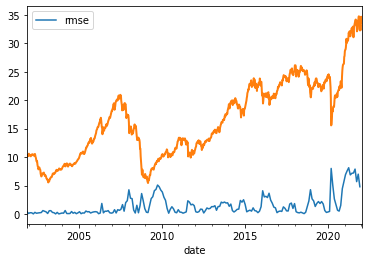

In [3]:
from backtesting import show_result
show_result(file_path, train_ends, rmses)

# ShareMemory with Billiard (not faster :()

In [ ]:
!pip install sharedmem

In [ ]:
from fund_price_loader import load_nav_table
import os
from gluonts.dataset.util import to_pandas
from fund_price_loader import NAV_DIR

nav_files = os.listdir(NAV_DIR)
file_path = os.path.join(NAV_DIR, nav_files[800])
nav_table = load_nav_table(file_path)

In [ ]:
import pandas as pd
from datetime import datetime
class Transfer:
    @staticmethod
    def to_shm(smm, nav_table):
        start_end_date = smm.ShareableList([str(nav_table.index.min()), str(nav_table.index.max())])
        values = smm.ShareableList(nav_table.value.tolist())
        return start_end_date, values
    
    @staticmethod
    def to_process(start_end_date, values): 
        __string_to_date = lambda x: datetime.strptime(x.split(' ')[0], '%Y-%m-%d')
        start = start_end_date[0]
        end = start_end_date[1]
        idx = pd.date_range(start=__string_to_date(start),
                            end=__string_to_date(end), 
                            freq="D")
        nav_table = pd.DataFrame(idx, columns=['date'])
        nav_table['value'] = list(values)
        nav_table.set_index('date', inplace=True)
        return nav_table

In [ ]:
from billiard.pool import Pool
from multiprocessing.managers import SharedMemoryManager
from functools import partial
def test_func(x, shared_objs=None):
    if shared_objs is None:
        return x + 1
    else:
        nav_table = Transfer.to_process(*shared_objs)
        return x + nav_table.iloc[0]

with SharedMemoryManager() as smm:
    shared_objs = Transfer.to_shm(smm, nav_table)
    with Pool(8) as p:
        ans_gen = p.imap(
            partial(test_func, shared_objs = shared_objs), range(10))
        ans = list(ans_gen)